In [10]:
import pandas as pd

import sqlite3
import pandas as pd
import numpy as np
import random


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import nbimporter
import Building_models_function_to_import


%matplotlib inline



In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# Business Understanding

The objective of this Research Project is to devise a model capable to perform better than what is considered the state of the art in predicting soccer match results. 

For this matter, different types of datasets are considered. These datasets contain information of different origin,  from previous match statistics to ratings of players playing in each side of the field. We will use these data to create models capable to predict future match results and we will compare ours models performance against benchmark techniques.

Specifically, to assess the succes of our task, we will compare the performance of our models against a predicting model built by using the odds of the main online bookmakers.

# Data Understanding


## Collect Data

https://www.kaggle.com/hugomathien/soccer#database.sqlite
http://www.football-data.co.uk/spainm.php
http://www.football-data.co.uk/englandm.php

## Describe Data

https://www.kaggle.com/hugomathien/soccer#database.sqlite

The ultimate Soccer database for data analysis and machine learning
What you get:

+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches


The data source is a .sqlite file which contained 7 tables:

**Country**:	A table containing the country name of soccer teams

**League**:	A table containing the name of all the soccer leagues

**Match**:	A table containing all the match details from 2007 to 2016

**Player**:	A table containing all player ID and player name for all the teams

**Player Attributes**:	A table containing additional information of all the players such as attacking ability, defensive ability, strength, etc.

**Team**:	A table containing all the team ID and team name

**Team Attributes**:	A table containing additional information of all the teams such as their attacking and defensive ability, etc.




http://www.football-data.co.uk/spainm.php
http://www.football-data.co.uk/englandm.php

*Key to results data:*

Div = League Division

Date = Match Date (dd/mm/yy)

HomeTeam = Home Team

AwayTeam = Away Team

FTHG and HG = Full Time Home Team Goals

FTAG and AG = Full Time Away Team Goals

FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

HTHG = Half Time Home Team Goals

HTAG = Half Time Away Team Goals

HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

.........................................

*Match Statistics (where available):*

Attendance = Crowd Attendance

Referee = Match Referee

HS = Home Team Shots

AS = Away Team Shots

HST = Home Team Shots on Target

AST = Away Team Shots on Target

HHW = Home Team Hit Woodwork

AHW = Away Team Hit Woodwork

HC = Home Team Corners

AC = Away Team Corners

HF = Home Team Fouls Committed

AF = Away Team Fouls Committed

HFKC = Home Team Free Kicks Conceded

AFKC = Away Team Free Kicks Conceded

HO = Home Team Offsides

AO = Away Team Offsides

HY = Home Team Yellow Cards

AY = Away Team Yellow Cards

HR = Home Team Red Cards

AR = Away Team Red Cards

HBP = Home Team Bookings Points (10 = yellow, 25 = red)

ABP = Away Team Bookings Points (10 = yellow, 25 = red)

## Explore data

Basically we are going to use data from 2 different origins. 
* Match statistics
* Fifa player ratings



### Match statistics

The information about match statistics will be gathered from the combination of the Match table in the database.sqlite database and csv files from footdata.co.uk.

In [12]:
# Create db connection.
cnx = sqlite3.connect('data/database.sqlite')

season = '2015/2016'
league_id = 10257

df_matches = pd.read_sql_query("SELECT * FROM Match WHERE league_id = (?) AND season = (?)", cnx, params=(league_id,season,)) 
df_matches.head()

id  country_id  league_id     season  stage                 date  \
0  12894       10257      10257  2015/2016      1  2015-08-23 00:00:00   
1  12895       10257      10257  2015/2016      1  2015-08-23 00:00:00   
2  12896       10257      10257  2015/2016      1  2015-08-23 00:00:00   
3  12897       10257      10257  2015/2016      1  2015-08-22 00:00:00   
4  12898       10257      10257  2015/2016      1  2015-08-23 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0       2060255              8534              8533               1   
1       2060256              8535              8564               2   
2       2060257              9891              9804               1   
3       2060258              9876              8686               1   
4       2060259              8636              8524               1   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               3               1               2               4   
1               0               1               2               4   
2               2               1               2               4   
3               1               1               2               4   
4               0               1               2               4   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0               6               8               3               5   
1               6               8               4               6   
2               6               8               2               4   
3               6               8               3               5   
4               6               8               3               5   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0               7               5                4                6   
1               3               5                7                5   
2               6               8                4                6   
3               7               3                5                7   
4               7               5                4                6   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0               1               2               4               6   
1               1               2               4               6   
2               1               3               5               7   
3               1               2               4               6   
4               1               2               4               6   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0               8               2               4               6   
1               8               3               5               7   
2               1               3               5               7   
3               8               3               5               7   
4               8               3               5               7   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0               8                4                6               1   
1               5                4                6               1   
2               9                4                6               1   
3               3                5                7               1   
4               3                5                7               1   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0               3               3               3               3   
1               3               3               3               3   
2               3               3               3               3   
3               3               3               3               3   
4               3               3               3               3   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0               6               6               6               8   
1               6               6               8               8  

In [4]:
df_league = pd.read_sql_query("SELECT * FROM Team", cnx) 
df_league.head()

id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB

In [5]:
location_to_file = 'data/'
season_footdata = season.replace('/','_').replace('20','') 
df_footballdata = pd.read_csv(location_to_file+'{0}_{1}.csv'.format(league_id,season_footdata))   
df_footballdata.head()  

Div      Date    HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  \
0  SP1  21/08/15      Malaga     Sevilla     0     0   D     0     0   D  25   
1  SP1  22/08/15  Ath Madrid  Las Palmas     1     0   H     1     0   H  14   
2  SP1  22/08/15     Espanol      Getafe     1     0   H     1     0   H   4   
3  SP1  22/08/15   La Coruna    Sociedad     0     0   D     0     0   D  15   
4  SP1  22/08/15   Vallecano    Valencia     0     0   D     0     0   D   8   

   AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A   BWH  \
0  10    5    2  19  11   7   2   3   3   0   1   3.40    3.4   2.15  3.30   
1   8    3    1  11  16   4   4   2   0   0   0   1.20    6.5  15.00  1.22   
2  14    2    3  19  14   5   6   2   3   0   1   1.91    3.4   4.33  1.95   
3   9    5    2  16  10   5   4   3   2   0   0   2.50    3.2   3.00  2.55   
4  10    3    4  19  11   3   3   3   1   0   0   3.60    3.5   2.05  3.50   

    BWD    BWA   IWH  IWD   IWA   LBH  LBD    LBA   PSH   PSD    PSA   WHH  \
0  3.40   2.25  2.90  3.3   2.3  3.40  3.3   2.25  3.39  3.57   2.25  3.20   
1  6.00  12.00  1.25  5.5  10.3  1.22  6.5  15.00  1.23  6.78  16.86  1.22   
2  3.25   4.00  2.00  3.3   3.6  1.91  3.4   4.50  1.93  3.47   4.68  1.91   
3  3.10   2.80  2.60  3.2   2.6  2.62  3.2   2.80  2.59  3.23   3.08  2.62   
4  3.40   2.05  3.60  3.3   2.0  3.60  3.6   2.00  3.72  3.77   2.06  3.60   

   WHD    WHA   VCH   VCD    VCA  Bb1X2  BbMxH  BbAvH  BbMxD  BbAvD  BbMxA  \
0  3.4   2.20  3.40  3.50   2.25     39   3.50   3.26   3.60   3.42   2.30   
1  5.5  15.00  1.22  6.50  19.00     41   1.25   1.21   6.78   6.09  19.00   
2  3.3   4.33  1.91  3.50   4.60     41   2.00   1.90   3.75   3.37   4.68   
3  3.0   2.90  2.55  3.30   3.00     41   2.75   2.52   3.40   3.14   3.10   
4  3.3   2.10  3.70  3.75   2.05     41   4.00   3.57   3.77   3.55   2.15   

   BbAvA  BbOU  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  \
0   2.20    37      1.95      1.86      2.02      1.92    24   0.25     2.02   
1  15.65    40      1.90      1.82      2.04      1.96    26  -1.75     2.02   
2   4.31    36      2.53      2.37      1.60      1.56    27  -0.50     1.95   
3   2.93    37      2.48      2.37      1.63      1.56    26   0.00     1.82   
4   2.02    39      1.83      1.75      2.15      2.04    27   0.50     1.90   

   BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD   PSCA  
0     1.95     1.94     1.90  3.22  3.50   2.36  
1     1.95     1.95     1.89  1.25  6.24  16.90  
2     1.90     2.01     1.94  2.10  3.28   4.19  
3     1.78     2.15     2.07  2.44  3.41   3.15  
4     1.83     2.08     2.01  2.93  3.68   2.46

### Fifa players ratings

The information about fifa ratings will be gathered from the Player_Attributes table in the database.sqlite database.

In [6]:
df_fifa = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) 
df_fifa.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0       44.0              71.0           61.0     44.0       51.0   45.0   
1       44.0              71.0           61.0     44.0       51.0   45.0   
2       44.0              71.0           61.0     44.0       51.0   45.0   
3       43.0              70.0           60.0     43.0       50.0   44.0   
4       43.0              70.0           60.0     43.0       50.0   44.0   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                39.0          64.0          49.0          60.0          64.0   
1                39.0          64.0          49.0          60.0          64.0   
2                39.0          64.0          49.0          60.0          64.0   
3                38.0          63.0          48.0          60.0          64.0   
4                38.0          63.0          48.0          60.0          64.0   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
1     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
2     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
3     59.0       46.0     65.0        54.0     58.0     54.0      76.0   
4     59.0       46.0     65.0        54.0     58.0     54.0      76.0   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0        35.0        71.0           70.0         45.0    54.0       48.0   
1        35.0        71.0           70.0         45.0    54.0       48.0   
2        35.0        63.0           41.0         45.0    54.0       48.0   
3        34.0        62.0           40.0         44.0    53.0       47.0   
4        34.0        62.0           40.0         44.0    53.0       47.0   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0     65.0             69.0            69.0        6.0         11.0   
1     65.0             69.0            69.0        6.0         11.0   
2     65.0             66.0            69.0        6.0         11.0   
3     62.0             63.0            66.0        5.0         10.0   
4     62.0             63.0            66.0        5.0         10.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        10.0             8.0          8.0  
1        10.0             8.0          8.0  
2        10.0             8.0          8.0  
3         9.0             7.0          7.0  
4         9.0             7.0          7.0

In [7]:
df_players = pd.read_sql_query("SELECT * FROM Player", cnx) 
df_players.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

# Data Preparation

We will create two different datasets and we will evaluate their performance in order to predict soccer match outcomes.

First dataset can be created with the following notebook:
* Team_performance_statistics.ipynb

If we take a look to the notebook it can be seen that changing the variables "seasons" and "leagues_id" we can obtain the features for the seasons and leagues desired. 

Second dataset can be created with the following notebook:
* FIFA_players_statistics.ipynb

Same as before, if we take a look to the notebook it can be seen that changing the variables "seasons" and "leagues_id" we can obtain the features for the seasons and leagues desired. 

For example, for this second dataset, if we select: 

seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']

leagues_id = [1729,21518]

we obtain the following dataset:

*dataset = df_stanford_fifa_features_leagues_[21518, 1729]_seasons_['15_16','14_15','13_14','12_13','11_12','10_11','09_10'].csv*





***

***

# Select data to use

'df_stanford_real_features' or 'df_stanford_fifa_features'

In [8]:
data = 'df_stanford_real_features'  

seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]


seasons_footdata = [i.replace('/','_').replace('20','') for i in seasons]
dataset = f'data/{data}_leagues_{leagues_id}_seasons_{seasons_footdata}.csv'
#dataset ='data/uuuuudf_merge_clustersdata_df_df_te.csv'

In [9]:
missing_values = ['n/a', 'na', '--', 'nan', 'Nan','NaN', ' ', '-']
df_matches = pd.read_csv(dataset, na_values = missing_values)

df_matches.head()

id  stage        date home_team_name_id away_team_name_id labels  \
0  24180      1  2015-08-21            málaga           sevilla      D   
1  24179      1  2015-08-22         atlmadrid            palmas      H   
2  24183      1  2015-08-22          espanyol            getafe      H   
3  24186      1  2015-08-22            coruña          sociedad      D   
4  24187      1  2015-08-22         vallecano          valencia      D   

   FTHG_mean  HTHG_mean  HS_mean  HST_mean  HF_mean  HC_mean  HY_mean  \
0        NaN        NaN      NaN       NaN      NaN      NaN      NaN   
1        NaN        NaN      NaN       NaN      NaN      NaN      NaN   
2        NaN        NaN      NaN       NaN      NaN      NaN      NaN   
3        NaN        NaN      NaN       NaN      NaN      NaN      NaN   
4        NaN        NaN      NaN       NaN      NaN      NaN      NaN   

   HR_mean  H_FTR_A_mean  H_FTR_D_mean  H_FTR_H_mean  H_HTR_A_mean  \
0      NaN           NaN           NaN           NaN           NaN   
1      NaN           NaN           NaN           NaN           NaN   
2      NaN           NaN           NaN           NaN           NaN   
3      NaN           NaN           NaN           NaN           NaN   
4      NaN           NaN           NaN           NaN           NaN   

   H_HTR_D_mean  H_HTR_H_mean  FTAG_mean  HTAG_mean  AS_mean  AST_mean  \
0           NaN           NaN        NaN        NaN      NaN       NaN   
1           NaN           NaN        NaN        NaN      NaN       NaN   
2           NaN           NaN        NaN        NaN      NaN       NaN   
3           NaN           NaN        NaN        NaN      NaN       NaN   
4           NaN           NaN        NaN        NaN      NaN       NaN   

   AF_mean  AC_mean  AY_mean  AR_mean  A_FTR_A_mean  A_FTR_D_mean  \
0      NaN      NaN      NaN      NaN           NaN           NaN   
1      NaN      NaN      NaN      NaN           NaN           NaN   
2      NaN      NaN      NaN      NaN           NaN           NaN   
3      NaN      NaN      NaN      NaN           NaN           NaN   
4      NaN      NaN      NaN      NaN           NaN           NaN   

   A_FTR_H_mean  A_HTR_A_mean  A_HTR_D_mean  A_HTR_H_mean  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN

In [10]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 34 columns):
id                   2660 non-null int64
stage                2660 non-null int64
date                 2660 non-null object
home_team_name_id    2660 non-null object
away_team_name_id    2660 non-null object
labels               2660 non-null object
FTHG_mean            2520 non-null float64
HTHG_mean            2520 non-null float64
HS_mean              2520 non-null float64
HST_mean             2520 non-null float64
HF_mean              2520 non-null float64
HC_mean              2520 non-null float64
HY_mean              2520 non-null float64
HR_mean              2520 non-null float64
H_FTR_A_mean         2520 non-null float64
H_FTR_D_mean         2520 non-null float64
H_FTR_H_mean         2520 non-null float64
H_HTR_A_mean         2520 non-null float64
H_HTR_D_mean         2520 non-null float64
H_HTR_H_mean         2520 non-null float64
FTAG_mean            2520 non-null float6

In [11]:
data = 'df_stanford_fifa_features_SMOTETomek' 

seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]


seasons_footdata = [i.replace('/','_').replace('20','') for i in seasons]
dataset = f'data/{data}_leagues_{leagues_id}_seasons_{seasons_footdata}.csv'
#dataset ='data/uuuuudf_merge_clustersdata_df_df_te.csv'

In [12]:
missing_values = ['n/a', 'na', '--', 'nan', 'Nan','NaN', ' ', '-']
df_fifa = pd.read_csv(dataset, na_values = missing_values)

df_fifa.head()

crossing_home  finishing_home  heading_accuracy_home  short_passing_home  \
0          75.25           66.50                  68.75               74.25   
1          84.00           76.75                  81.00               84.50   
2          72.00           73.00                  72.00               75.00   
3          78.75           75.75                  76.75               81.25   
4          73.00           70.00                  70.75               75.75   

   volleys_home  dribbling_home  curve_home  free_kick_accuracy_home  \
0         69.75           68.50       77.50                    74.50   
1         74.75           80.25       81.25                    79.50   
2         74.25           74.25       76.50                    74.00   
3         69.75           70.50       80.25                    76.25   
4         72.50           68.50       76.50                    66.25   

   long_passing_home  ball_control_home  acceleration_home  sprint_speed_home  \
0               70.0               70.0               55.4               70.8   
1               81.8               82.4               72.2               81.2   
2               76.4               75.2               61.4               71.6   
3               72.2               78.6               75.8               79.6   
4               76.0               70.4               70.6               72.4   

   agility_home  reactions_home  balance_home  shot_power_home  jumping_home  \
0          74.2            74.8          78.4             75.6          74.2   
1          84.0            79.8          83.2             82.6          82.6   
2          77.6            78.2          79.4             85.8          76.0   
3          78.6            78.4          80.6             76.4          82.0   
4          77.4            75.2          72.6             75.0          73.6   

   stamina_home  strength_home  long_shots_home  aggression_home  \
0          74.4           73.8             77.6             82.4   
1          75.2           80.4             82.0             85.0   
2          76.8           77.6             80.2             81.2   
3          75.2           79.4             85.4             85.4   
4          74.2           82.0             78.2             77.6   

   interceptions_home  positioning_home  vision_home  penalties_home  \
0                79.4              67.8         81.6            75.4   
1                79.6              74.2         82.4            82.4   
2                79.4              70.0         77.2            72.4   
3                80.0              73.0         80.6            79.4   
4                81.4              73.8         75.0            71.6   

   marking_home  standing_tackle_home  sliding_tackle_home  gk_diving_home  \
0          67.8                  68.2                 65.2            80.0   
1          79.2                  82.0                 69.6            74.0   
2          73.2                  68.4                 66.8            81.0   
3          79.4                  77.8                 64.6            69.0   
4          70.8                  73.6                 70.4            77.0   

   gk_handling_home  gk_kicking_home  gk_positioning_home  gk_reflexes_home  \
0              69.0             78.0                 68.0              81.0   
1              83.0             67.0                 79.0              77.0   
2              71.0             59.0                 65.0              85.0   
3              80.0             80.0                 82.0              78.0   
4              72.0             67.0                 69.0              79.0   

   crossing_away  finishing_away  heading_accuracy_away  short_passing_away  \
0          77.50           76.25                  70.75                77.0   
1          66.50           59.25                  69.50                74.0   
2          79.50           72.75                  80.75                82.0   
3          85.75         

In [13]:
#df_fifa.info()

# Verifying quality of data

## Analysing df_matches

In [14]:
columns = df_matches.columns

for column in columns:
    nulls = sum(df_matches[column].isnull())
    print (f'{nulls} nulls in numeric variable : {column}')    

0 nulls in numeric variable : id
0 nulls in numeric variable : stage
0 nulls in numeric variable : date
0 nulls in numeric variable : home_team_name_id
0 nulls in numeric variable : away_team_name_id
0 nulls in numeric variable : labels
140 nulls in numeric variable : FTHG_mean
140 nulls in numeric variable : HTHG_mean
140 nulls in numeric variable : HS_mean
140 nulls in numeric variable : HST_mean
140 nulls in numeric variable : HF_mean
140 nulls in numeric variable : HC_mean
140 nulls in numeric variable : HY_mean
140 nulls in numeric variable : HR_mean
140 nulls in numeric variable : H_FTR_A_mean
140 nulls in numeric variable : H_FTR_D_mean
140 nulls in numeric variable : H_FTR_H_mean
140 nulls in numeric variable : H_HTR_A_mean
140 nulls in numeric variable : H_HTR_D_mean
140 nulls in numeric variable : H_HTR_H_mean
140 nulls in numeric variable : FTAG_mean
140 nulls in numeric variable : HTAG_mean
140 nulls in numeric variable : AS_mean
140 nulls in numeric variable : AST_mean
140

We have 280 nulls in each of those categories because those correspond to the games played in the first league day (2 leagues \* 7 seasons \* 20 games).

We will just discard those ones.

In [15]:
df_matches.dropna(inplace=True)
columns = df_matches.columns

for column in columns:
    nulls = sum(df_matches[column].isnull())
    print (f'{nulls} nulls in numeric variable : {column}')    

0 nulls in numeric variable : id
0 nulls in numeric variable : stage
0 nulls in numeric variable : date
0 nulls in numeric variable : home_team_name_id
0 nulls in numeric variable : away_team_name_id
0 nulls in numeric variable : labels
0 nulls in numeric variable : FTHG_mean
0 nulls in numeric variable : HTHG_mean
0 nulls in numeric variable : HS_mean
0 nulls in numeric variable : HST_mean
0 nulls in numeric variable : HF_mean
0 nulls in numeric variable : HC_mean
0 nulls in numeric variable : HY_mean
0 nulls in numeric variable : HR_mean
0 nulls in numeric variable : H_FTR_A_mean
0 nulls in numeric variable : H_FTR_D_mean
0 nulls in numeric variable : H_FTR_H_mean
0 nulls in numeric variable : H_HTR_A_mean
0 nulls in numeric variable : H_HTR_D_mean
0 nulls in numeric variable : H_HTR_H_mean
0 nulls in numeric variable : FTAG_mean
0 nulls in numeric variable : HTAG_mean
0 nulls in numeric variable : AS_mean
0 nulls in numeric variable : AST_mean
0 nulls in numeric variable : AF_mean
0

## Analysing df_fifa


In [16]:
columns = df_fifa.columns

for column in columns:
    nulls = sum(df_fifa[column].isnull())
    print (f'{nulls} nulls in numeric variable : {column}') 

0 nulls in numeric variable : crossing_home
0 nulls in numeric variable : finishing_home
0 nulls in numeric variable : heading_accuracy_home
0 nulls in numeric variable : short_passing_home
0 nulls in numeric variable : volleys_home
0 nulls in numeric variable : dribbling_home
0 nulls in numeric variable : curve_home
0 nulls in numeric variable : free_kick_accuracy_home
0 nulls in numeric variable : long_passing_home
0 nulls in numeric variable : ball_control_home
0 nulls in numeric variable : acceleration_home
0 nulls in numeric variable : sprint_speed_home
0 nulls in numeric variable : agility_home
0 nulls in numeric variable : reactions_home
0 nulls in numeric variable : balance_home
0 nulls in numeric variable : shot_power_home
0 nulls in numeric variable : jumping_home
0 nulls in numeric variable : stamina_home
0 nulls in numeric variable : strength_home
0 nulls in numeric variable : long_shots_home
0 nulls in numeric variable : aggression_home
0 nulls in numeric variable : interc

In [17]:
df_fifa.dropna(inplace=True)
columns = df_fifa.columns

for column in columns:
    nulls = sum(df_fifa[column].isnull())
    print (f'{nulls} nulls in numeric variable : {column}')   

0 nulls in numeric variable : crossing_home
0 nulls in numeric variable : finishing_home
0 nulls in numeric variable : heading_accuracy_home
0 nulls in numeric variable : short_passing_home
0 nulls in numeric variable : volleys_home
0 nulls in numeric variable : dribbling_home
0 nulls in numeric variable : curve_home
0 nulls in numeric variable : free_kick_accuracy_home
0 nulls in numeric variable : long_passing_home
0 nulls in numeric variable : ball_control_home
0 nulls in numeric variable : acceleration_home
0 nulls in numeric variable : sprint_speed_home
0 nulls in numeric variable : agility_home
0 nulls in numeric variable : reactions_home
0 nulls in numeric variable : balance_home
0 nulls in numeric variable : shot_power_home
0 nulls in numeric variable : jumping_home
0 nulls in numeric variable : stamina_home
0 nulls in numeric variable : strength_home
0 nulls in numeric variable : long_shots_home
0 nulls in numeric variable : aggression_home
0 nulls in numeric variable : interc

# Feature Engineering

## Feature Engineering for df_matches

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 20 to 2659
Data columns (total 72 columns):
id                         2518 non-null int64
stage                      2518 non-null int64
date                       2518 non-null datetime64[ns]
home_team_name_id          2518 non-null object
away_team_name_id          2518 non-null object
labels                     2518 non-null object
FTHG_mean                  2518 non-null float64
HTHG_mean                  2518 non-null float64
HS_mean                    2518 non-null float64
HST_mean                   2518 non-null float64
HF_mean                    2518 non-null float64
HC_mean                    2518 non-null float64
HY_mean                    2518 non-null float64
HR_mean                    2518 non-null float64
H_FTR_A_mean               2518 non-null float64
H_FTR_D_mean               2518 non-null float64
H_FTR_H_mean               2518 non-null float64
H_HTR_A_mean               2518 non-null float64
H_HTR_D_me

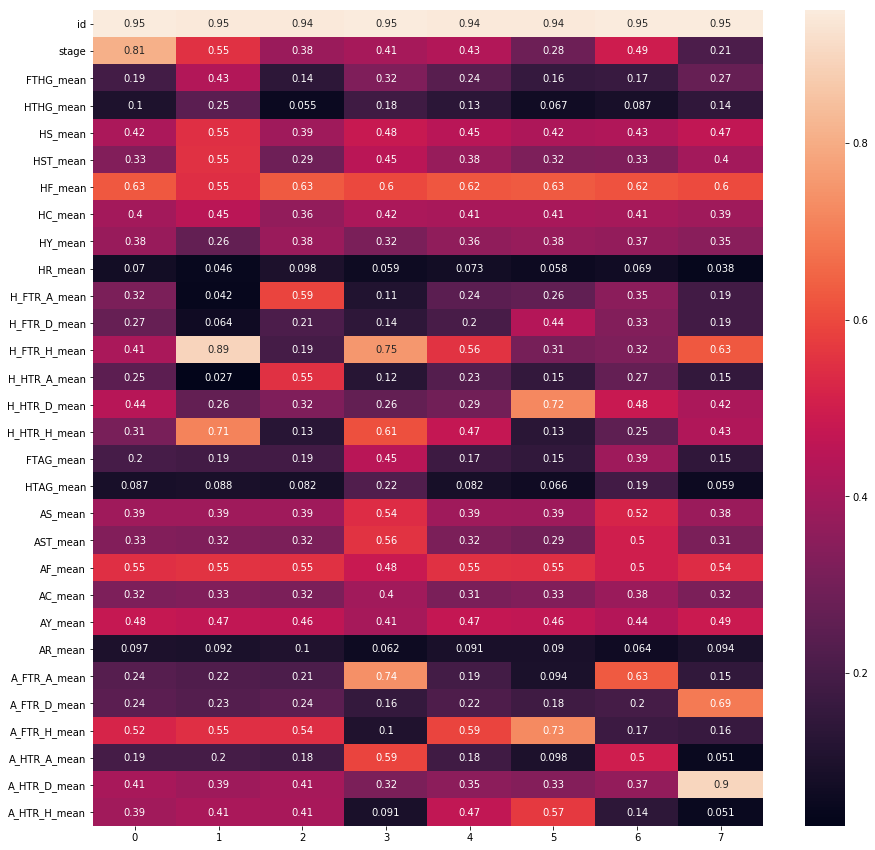

In [18]:
df_matches_afterFE = Building_models_function_to_import.feature_engineering_real_features(df_matches)

# Feature Engineering for df_fifa

In [ ]:
df_fifa_afterFE = Building_models_function_to_import.feature_engineering_fifa_features(df_fifa)

Index(['crossing_home', 'finishing_home', 'heading_accuracy_home',
       'short_passing_home', 'volleys_home', 'dribbling_home', 'curve_home',
       'free_kick_accuracy_home', 'long_passing_home', 'ball_control_home',
       'acceleration_home', 'sprint_speed_home', 'agility_home',
       'reactions_home', 'balance_home', 'shot_power_home', 'jumping_home',
       'stamina_home', 'strength_home', 'long_shots_home', 'aggression_home',
       'interceptions_home', 'positioning_home', 'vision_home',
       'penalties_home', 'marking_home', 'standing_tackle_home',
       'sliding_tackle_home', 'gk_diving_home', 'gk_handling_home',
       'gk_kicking_home', 'gk_positioning_home', 'gk_reflexes_home',
       'crossing_away', 'finishing_away', 'heading_accuracy_away',
       'short_passing_away', 'volleys_away', 'dribbling_away', 'curve_away',
       'free_kick_accuracy_away', 'long_passing_away', 'ball_control_away',
       'acceleration_away', 'sprint_speed_away', 'agility_away',
       're

KeyError: 'date'

## Deletion of date and id features because clearly do not give any value

In [ ]:
df_matches_afterFE = df_matches_afterFE.drop(columns= ['date','id','id_categories'])
df_matches_beforeFE = df_matches.drop(columns= ['date','id'])

df_fifa_afterFE = df_fifa_afterFE.drop(columns= ['date','id','id_categories'])
df_fifa_beforeFE = df_fifa.drop(columns= ['date','id'])

Deletion of date and id features because clearly do not give any value


# Analysis of models performance. First without FE and then after FE 

## Without FE

In [ ]:
df_matches.info()

In [ ]:
categoric_types = df_matches.select_dtypes(include=['category','object']).columns.tolist()
categoric_types.remove('labels')
categoric_types

In [ ]:
df = df_fifa_beforeFE

repetitions = 20
randomseeds = [random.randint(1,10000) for i in range(repetitions) ]

### LR

In [ ]:
import warnings
import random

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df.columns
    df_fi_all = pd.DataFrame(index=cols.drop(['labels']))
    
    res_all = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_all, feature_importance_all, df_wrong_predictions_all = Building_models_function_to_import.classifiers_performances(df, classifier={'lr': LogisticRegression(solver='lbfgs',multi_class='auto')} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_all = pd.concat([df_fi_all, feature_importance_all], axis=1)
        res_all =res_all.append(results_all)
        
    appearances = df_fi_all.notnull().sum(axis=1)
    df_fi_all['fi_mean'] = df_fi_all.agg('mean', axis='columns')
    df_fi_all['fi_variance'] = df_fi_all.agg(np.var, axis='columns')
    df_fi_all['fi_appearances'] = appearances
    
   
    df_fi_all = df_fi_all.sort_values('fi_mean', ascending=False)    
    res_all = res_all.agg('mean')
    





In [ ]:
res_all

In [ ]:
df_fi_all[['fi_mean','fi_appearances','fi_variance']].head(10)

Now we select just the features more importants than any random feature from the evaluations performed before.


In [ ]:
import warnings
import random
df_cut = df[['HY_mean','A_FTR_H_mean','AR_mean','H_HTR_H_mean','A_FTR_D_mean','H_FTR_D_mean','labels']]

In [ ]:
import warnings
import random


with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df_cut.columns
    df_fi_cut = pd.DataFrame(index=cols.drop(['labels']))
    
    res_cut = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_cut, feature_importance_cut, df_wrong_predictions_cut = Building_models_function_to_import.classifiers_performances(df_cut, classifier={'lr': LogisticRegression(solver='lbfgs',multi_class='auto')} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_cut = pd.concat([df_fi_cut, feature_importance_cut], axis=1)
        res_cut =res_cut.append(results_cut)
        
    appearances = df_fi_cut.notnull().sum(axis=1)
    df_fi_cut['fi_mean'] = df_fi_cut.agg('mean', axis='columns')
    df_fi_cut['fi_variance'] = df_fi_cut.agg(np.var, axis='columns')
    df_fi_cut['fi_appearances'] = appearances
    
   
    df_fi_cut = df_fi_cut.sort_values('fi_mean', ascending=False)   
    res_cut = res_cut.agg('mean')





In [ ]:
res_cut

In [ ]:
df_fi_cut[['fi_mean','fi_appearances','fi_variance']].head(10)

### RF

In [ ]:
import warnings
import random

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df.columns
    df_fi_all = pd.DataFrame(index=cols.drop(['labels']))
    
    res_all = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_all, feature_importance_all, df_wrong_predictions_all = Building_models_function_to_import.classifiers_performances(df, classifier={'rf' : RandomForestClassifier(oob_score=True, max_depth=6)} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_all = pd.concat([df_fi_all, feature_importance_all], axis=1)
        res_all =res_all.append(results_all)
        
    appearances = df_fi_all.notnull().sum(axis=1)
    df_fi_all['fi_mean'] = df_fi_all.agg('mean', axis='columns')
    df_fi_all['fi_variance'] = df_fi_all.agg(np.var, axis='columns')
    df_fi_all['fi_appearances'] = appearances
    
   
    df_fi_all = df_fi_all.sort_values('fi_mean', ascending=False)    
    res_all = res_all.agg('mean')
    



In [ ]:
res_all

In [ ]:
df_fi_all.index

In [ ]:
df_fi_all[['fi_mean','fi_appearances','fi_variance']].head(10)

Now we select just the features more importants than any random feature from the evaluations performed before.


In [ ]:
import warnings
import random

df_cut = df[['away_team_name_id','home_team_name_id','labels']]

In [ ]:


with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df_cut.columns
    df_fi_cut = pd.DataFrame(index=cols.drop(['labels']))
    
    res_cut = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_cut, feature_importance_cut, df_wrong_predictions_cut = Building_models_function_to_import.classifiers_performances(df_cut, classifier={'rf' : RandomForestClassifier(oob_score=True, max_depth=6)} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_cut = pd.concat([df_fi_cut, feature_importance_cut], axis=1)
        res_cut =res_cut.append(results_cut)
        
    appearances = df_fi_cut.notnull().sum(axis=1)
    df_fi_cut['fi_mean'] = df_fi_cut.agg('mean', axis='columns')
    df_fi_cut['fi_variance'] = df_fi_cut.agg(np.var, axis='columns')
    df_fi_cut['fi_appearances'] = appearances
    
   
    df_fi_cut = df_fi_cut.sort_values('fi_mean', ascending=False)
    
    res_cut = res_cut.agg('mean')
    

    display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])


display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])

In [ ]:
res_cut

In [ ]:
df_fi_cut[['fi_mean','fi_appearances','fi_variance']].head(10)

### XGBClassifier

In [ ]:
## import warnings
import random

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df.columns
    df_fi_all = pd.DataFrame(index=cols.drop(['labels']))
    
    res_all = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_all, feature_importance_all, df_wrong_predictions_all = Building_models_function_to_import.classifiers_performances(df, classifier={'XGBClassifier': XGBClassifier()} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_all = pd.concat([df_fi_all, feature_importance_all], axis=1)
        res_all =res_all.append(results_all)
        
    appearances = df_fi_all.notnull().sum(axis=1)
    df_fi_all['fi_mean'] = df_fi_all.agg('mean', axis='columns')
    df_fi_all['fi_variance'] = df_fi_all.agg(np.var, axis='columns')
    df_fi_all['fi_appearances'] = appearances
    
   
    df_fi_all = df_fi_all.sort_values('fi_mean', ascending=False)
    
    res_all = res_all.agg('mean')
    

In [ ]:
res_all

In [ ]:
df_fi_all.head(10)

Now we select just the features more importants than any random feature from the evaluations performed before.


In [ ]:
## import warnings
import random

df_cut = df[['HC_mean','HF_mean','HS_mean','AY_mean','AC_mean','A_HTR_A_mean','labels']]

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df_cut.columns
    df_fi_cut = pd.DataFrame(index=cols.drop(['labels']))
    
    res_cut = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_cut, feature_importance_cut, df_wrong_predictions_cut = Building_models_function_to_import.classifiers_performances(df_cut, classifier={'XGBClassifier': XGBClassifier()} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_cut = pd.concat([df_fi_cut, feature_importance_cut], axis=1)
        res_cut =res_cut.append(results_cut)
        
    appearances = df_fi_cut.notnull().sum(axis=1)
    df_fi_cut['fi_mean'] = df_fi_cut.agg('mean', axis='columns')
    df_fi_cut['fi_variance'] = df_fi_cut.agg(np.var, axis='columns')
    df_fi_cut['fi_appearances'] = appearances
    
   
    df_fi_cut = df_fi_cut.sort_values('fi_mean', ascending=False)
    
    res_cut = res_cut.agg('mean')
    

    display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])


display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])


In [ ]:
res_cut

In [ ]:
df_fi_cut[['fi_mean','fi_appearances','fi_variance']].head(10)

## After FE

In [ ]:
df = df_fifa_afterFE

### LR

In [ ]:
import warnings
import random

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df.columns
    df_fi_all = pd.DataFrame(index=cols.drop(['labels']))
    
    res_all = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_all, feature_importance_all, df_wrong_predictions_all = Building_models_function_to_import.classifiers_performances(df, classifier={'lr': LogisticRegression(solver='lbfgs',multi_class='auto')} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_all = pd.concat([df_fi_all, feature_importance_all], axis=1)
        res_all =res_all.append(results_all)
        
    appearances = df_fi_all.notnull().sum(axis=1)
    df_fi_all['fi_mean'] = df_fi_all.agg('mean', axis='columns')
    df_fi_all['fi_variance'] = df_fi_all.agg(np.var, axis='columns')
    df_fi_all['fi_appearances'] = appearances
    
   
    df_fi_all = df_fi_all.sort_values('fi_mean', ascending=False)
    
    res_all = res_all.agg('mean')




In [ ]:
res_all

In [ ]:
df_fi_all

Now we select just the features more importants than any random feature from the evaluations performed before.

In [ ]:
df_cut = df[['AF_mean', 'A_HTR_A_mean_categories', 'Cluster', 'AST_mean',
       'A_FTR_H_mean_categories', 'goal_diff', 'HR_mean_categories',
       'A_FTR_A_mean_categories', 'A_HTR_D_mean_categories',
       'H_FTR_H_mean_categories', 'HC_mean', 'A_HTR_H_mean_categories',
       'FTAG_mean', 'AY_mean_categories', 'H_HTR_A_mean', 'stage_categories',
       'A_FTR_H_mean', 'H_HTR_A_mean_categories', 'HTAG_mean', 'AC_mean',
       'A_HTR_H_mean','labels']]

In [ ]:
import warnings
import random



with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df_cut.columns
    df_fi_cut = pd.DataFrame(index=cols.drop(['labels']))
    
    res_cut = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_cut, feature_importance_cut, df_wrong_predictions_cut = Building_models_function_to_import.classifiers_performances(df_cut, classifier={'lr': LogisticRegression(solver='lbfgs',multi_class='auto')} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_cut = pd.concat([df_fi_cut, feature_importance_cut], axis=1)
        res_cut =res_cut.append(results_cut)
        
    appearances = df_fi_cut.notnull().sum(axis=1)
    df_fi_cut['fi_mean'] = df_fi_cut.agg('mean', axis='columns')
    df_fi_cut['fi_variance'] = df_fi_cut.agg(np.var, axis='columns')
    df_fi_cut['fi_appearances'] = appearances
    
   
    df_fi_cut = df_fi_cut.sort_values('fi_mean', ascending=False)
    
    res_cut = res_cut.agg('mean')
    

    display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])


display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])

In [ ]:
res_cut

### RF

In [ ]:
import warnings
import random

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df.columns
    df_fi_all = pd.DataFrame(index=cols.drop(['labels']))
    
    res_all = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_all, feature_importance_all, df_wrong_predictions_all = Building_models_function_to_import.classifiers_performances(df, classifier={'rf' : RandomForestClassifier(oob_score=True, max_depth=6)} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_all = pd.concat([df_fi_all, feature_importance_all], axis=1)
        res_all =res_all.append(results_all)
        
    appearances = df_fi_all.notnull().sum(axis=1)
    df_fi_all['fi_mean'] = df_fi_all.agg('mean', axis='columns')
    df_fi_all['fi_variance'] = df_fi_all.agg(np.var, axis='columns')
    df_fi_all['fi_appearances'] = appearances
    
   
    df_fi_all = df_fi_all.sort_values('fi_mean', ascending=False)
    
    res_all = res_all.agg('mean')


In [ ]:
res_all

In [ ]:
df_fi_all

Now we select just the features more importants than any random feature from the evaluations performed before.

In [ ]:
df_cut = df[['home_team_name_id', 'away_team_name_id', 'stage',
       'FTAG_mean_categories', 'stage_categories', 'FTHG_mean_categories',
       'HY_mean_categories', 'HS_mean', 'H_FTR_A_mean_categories',
       'H_HTR_A_mean', 'A_HTR_H_mean', 'HC_mean_categories', 'H_FTR_D_mean',
       'H_HTR_D_mean', 'HR_mean_categories', 'AST_mean_categories','labels']]

In [ ]:
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df_cut.columns
    df_fi_cut = pd.DataFrame(index=cols.drop(['labels']))
    
    res_cut = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_cut, feature_importance_cut, df_wrong_predictions_cut = Building_models_function_to_import.classifiers_performances(df_cut, classifier={'rf' : RandomForestClassifier(oob_score=True, max_depth=6)} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_cut = pd.concat([df_fi_cut, feature_importance_cut], axis=1)
        res_cut =res_cut.append(results_cut)
        
    appearances = df_fi_cut.notnull().sum(axis=1)
    df_fi_cut['fi_mean'] = df_fi_cut.agg('mean', axis='columns')
    df_fi_cut['fi_variance'] = df_fi_cut.agg(np.var, axis='columns')
    df_fi_cut['fi_appearances'] = appearances
    
   
    df_fi_cut = df_fi_cut.sort_values('fi_mean', ascending=False)
    
    res_cut = res_cut.agg('mean')
    

    display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])


display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])



In [ ]:
res_cut

### XGBClassifier

In [ ]:
import warnings
import random

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df.columns
    df_fi_all = pd.DataFrame(index=cols.drop(['labels']))
    
    res_all = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_all, feature_importance_all, df_wrong_predictions_all = Building_models_function_to_import.classifiers_performances(df, classifier={'XGBClassifier': XGBClassifier()} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_all = pd.concat([df_fi_all, feature_importance_all], axis=1)
        res_all =res_all.append(results_all)
        
    appearances = df_fi_all.notnull().sum(axis=1)
    df_fi_all['fi_mean'] = df_fi_all.agg('mean', axis='columns')
    df_fi_all['fi_variance'] = df_fi_all.agg(np.var, axis='columns')
    df_fi_all['fi_appearances'] = appearances
    
   
    df_fi_all = df_fi_all.sort_values('fi_mean', ascending=False)
    
    res_all = res_all.agg('mean')
    

In [ ]:
res_all

In [ ]:
df_fi_all

Now we select just the features more importants than any random feature from the evaluations performed before.

In [ ]:
#df_cut = df[['AF_mean','HF_mean','AY_mean','HS_mean','away_team_weekday_year','HTAG_mean','labels']]
df_cut = df[['standing_tackle_home','short_passing_home','acceleration_home','heading_accuracy_home','long_shots_away','jumping_home','labels']]

In [ ]:
import warnings
import random



with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    cols = df_cut.columns
    df_fi_cut = pd.DataFrame(index=cols.drop(['labels']))
    
    res_cut = pd.DataFrame(columns= ['train_accuracy','test_accuracy','f1_score'])
    
    for i in range(repetitions):
        results_cut, feature_importance_cut, df_wrong_predictions_cut = Building_models_function_to_import.classifiers_performances(df_cut, classifier={'XGBClassifier': XGBClassifier()} ,scaler= False, onehot=[False], labelling= [False], random_seed =randomseeds[i])
        df_fi_cut = pd.concat([df_fi_cut, feature_importance_cut], axis=1)
        res_cut =res_cut.append(results_cut)
        
    appearances = df_fi_cut.notnull().sum(axis=1)
    df_fi_cut['fi_mean'] = df_fi_cut.agg('mean', axis='columns')
    df_fi_cut['fi_variance'] = df_fi_cut.agg(np.var, axis='columns')
    df_fi_cut['fi_appearances'] = appearances
    
   
    df_fi_cut = df_fi_cut.sort_values('fi_mean', ascending=False)
    
    res_cut = res_cut.agg('mean')
    

    display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])


display(df_fi_cut[['fi_mean','fi_appearances','fi_variance']])



In [ ]:
res_cut

In [ ]:
result_afterFE

In [ ]:


df_matches.columns




In [ ]:
categoric_types = df_matches.select_dtypes(include=['category','object']).columns.tolist()
categoric_types.remove('labels')
if categoric_types == []:
    categoric_types = [False]

In [ ]:
import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    result, fi, df_wrong_predictions = Building_models_function_to_import.classifiers_performances(df_matches, scaler= False, onehot=[False], labelling= categoric_types, feature_importance = True)


# After FE


In [ ]:
df_fifa_afterFE.info()

In [ ]:
categoric_types = df_fifa_afterFE.select_dtypes(include=['category','object']).columns.tolist()
categoric_types.remove('labels')
categoric_types

In [ ]:
import nbimporter
import Building_models_function_to_import

import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    result_afterFE, fi_afterFE, df_wrong_predictions = Building_models_function_to_import.classifiers_performances(df_fifa_afterFE, scaler= False, onehot=[False], labelling= ['crossing_home_categories',
 'finishing_home_categories',
 'heading_accuracy_home_categories',
 'short_passing_home_categories',
 'volleys_home_categories',
 'dribbling_home_categories',
 'curve_home_categories',
 'free_kick_accuracy_home_categories',
 'long_passing_home_categories',
 'ball_control_home_categories',
 'acceleration_home_categories',
 'sprint_speed_home_categories',
 'agility_home_categories',
 'reactions_home_categories',
 'balance_home_categories',
 'shot_power_home_categories',
 'jumping_home_categories',
 'stamina_home_categories',
 'strength_home_categories',
 'long_shots_home_categories',
 'aggression_home_categories',
 'interceptions_home_categories',
 'positioning_home_categories',
 'vision_home_categories',
 'penalties_home_categories',
 'marking_home_categories',
 'standing_tackle_home_categories',
 'sliding_tackle_home_categories',
 'gk_diving_home_categories',
 'gk_handling_home_categories',
 'gk_kicking_home_categories',
 'gk_positioning_home_categories',
 'gk_reflexes_home_categories',
 'crossing_away_categories',
 'finishing_away_categories',
 'heading_accuracy_away_categories',
 'short_passing_away_categories',
 'volleys_away_categories',
 'dribbling_away_categories',
 'curve_away_categories',
 'free_kick_accuracy_away_categories',
 'long_passing_away_categories',
 'ball_control_away_categories',
 'acceleration_away_categories',
 'sprint_speed_away_categories',
 'agility_away_categories',
 'reactions_away_categories',
 'balance_away_categories',
 'shot_power_away_categories',
 'jumping_away_categories',
 'stamina_away_categories',
 'strength_away_categories',
 'long_shots_away_categories',
 'aggression_away_categories',
 'interceptions_away_categories',
 'positioning_away_categories',
 'vision_away_categories',
 'penalties_away_categories',
 'marking_away_categories',
 'standing_tackle_away_categories',
 'sliding_tackle_away_categories',
 'gk_diving_away_categories',
 'gk_handling_away_categories',
 'gk_kicking_away_categories',
 'gk_positioning_away_categories',
 'gk_reflexes_away_categories',
 'stage_categories'],feature_importance = True)





### Comparison before and After FE for df_matches

In [ ]:
result

In [ ]:
result_afterFE

Next, we will do a custome cross validation taking one season-league at a time as the test data in order to assess that our models are consistent for the different seasons. We'll do it for both datasets.

# Cross Validation taking one season-league at a time as the test data

##  'stanford_real_features'

First for the 'stanford_real_features' type of data that is the name of how we have saved the data builded before for different seasons-leagues of 'df_matches'.

keys dict_keys(['XGBClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'LogisticRegression'])
Running GridSearch for XGBClassifier.
model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=512,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

>>>  CLASSIFIER: lr

--------------

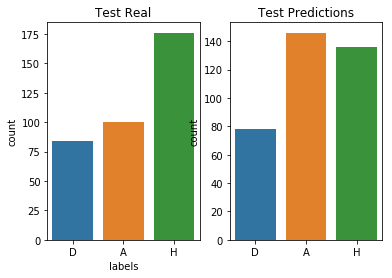

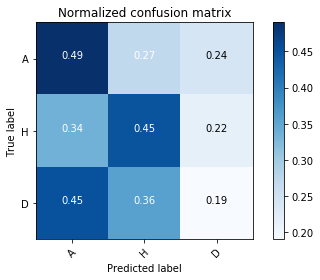


>>>  CLASSIFIER: lr



KeyboardInterrupt: 

In [5]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]

dataset = 'stanford_real_features' # df_matches
dataset = 'stanford_real_features_AfterFE'
# dataset = 'stanford_fifa_features' # df_matches
# dataset = 'stanford_fifa_features_AfterFE'


models = {
'XGBClassifier': XGBClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'LogisticRegression' : LogisticRegression(),
}

params = {
    'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8] },
    'RandomForestClassifier': { 'n_estimators': [512] },
    'AdaBoostClassifier':  { 'n_estimators': [512] },
    'GradientBoostingClassifier': { 'n_estimators': [256], 'learning_rate': [0.2,0.8, 1.0] },
    'LogisticRegression': {'penalty': ['l2'], 'C' : [0.15,1,2,5]},
}


# models = {
# 'XGBClassifier': XGBClassifier()
# }

# params = {
#     'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8] }
# }

keys = models.keys()
cv=3
n_jobs=6
verbose=1
scoring=None
refit=False


from sklearn.metrics import log_loss
from sklearn.model_selection import ParameterGrid

res_all = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores'])

for key in keys:
    print('keys',keys)
    print("Running GridSearch for %s." % key)
    model = models[key]
    
    params_2 = params[key]
    params_2_list = list(ParameterGrid(params_2))
    print('model: ',model)
    for i in range(len(params_2_list)):
        model = model.set_params(**params_2_list[i])
        print('model: ',model)

        import warnings
        with warnings.catch_warnings():
        # ignore all caught warnings
            warnings.filterwarnings("ignore")
            results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=model,classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False],feature_importance=False)
            res_all.loc[f'{key}_{params_2_list[i]}',:] = avg_results_lr.loc[0,['avg_train_acc','avg_test_acc','avg_f1_scores']]

res_all = res_all.sort_values(['avg_f1_scores','avg_test_acc'], ascending=False)
res_all
    

In [4]:
res_all

avg_train_acc avg_test_acc  \
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}          0.59941     0.538984   
LogisticRegression_{'C': 1, 'penalty': 'l2'}            0.599094      0.53554   
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.599536     0.534828   
LogisticRegression_{'C': 2, 'penalty': 'l2'}            0.599096     0.534847   
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...             1     0.516356   
XGBClassifier_{'learning_rate': 0.8, 'n_estimat...             1     0.503936   
RandomForestClassifier_{'n_estimators': 512}                   1     0.549949   
GradientBoostingClassifier_{'learning_rate': 0....             1     0.485433   
GradientBoostingClassifier_{'learning_rate': 0....      0.999497     0.497046   
GradientBoostingClassifier_{'learning_rate': 1....             1     0.479371   
AdaBoostClassifier_{'n_estimators': 512}                0.722543     0.468873   

                                                   avg_f1_scores  
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}         0.497462  
LogisticRegression_{'C': 1, 'penalty': 'l2'}            0.495533  
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.494532  
LogisticRegression_{'C': 2, 'penalty': 'l2'}            0.493876  
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...      0.481007  
XGBClassifier_{'learning_rate': 0.8, 'n_estimat...      0.480139  
RandomForestClassifier_{'n_estimators': 512}            0.473091  
GradientBoostingClassifier_{'learning_rate': 0....      0.470588  
GradientBoostingClassifier_{'learning_rate': 0....      0.469633  
GradientBoostingClassifier_{'learning_rate': 1....      0.461583  
AdaBoostClassifier_{'n_estimators': 512}                0.451496

# MERGE

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]

dataset = 'stanford_real_features' # df_matches
dataset = 'stanford_real_features_AfterFE'
dataset = 'stanford_fifa_features' # df_matches
dataset = 'stanford_fifa_features_AfterFE'
dataset = 'merge_df_stanford_fifa_features_df_stanford_real_features'
dataset = 'merge_df_stanford_fifa_features_AfterFE_df_stanford_real_features_AfterFE'

models = {
'XGBClassifier': XGBClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'LogisticRegression' : LogisticRegression(),
}

params = {
    'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8] },
    'RandomForestClassifier': { 'n_estimators': [512] },
    'AdaBoostClassifier':  { 'n_estimators': [512] },
    'GradientBoostingClassifier': { 'n_estimators': [256], 'learning_rate': [0.2,0.8, 1.0] },
    'LogisticRegression': {'penalty': ['l2'], 'C' : [0.15,1,2,5]},
}


# models = {
# 'XGBClassifier': XGBClassifier()
# }

# params = {
#     'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8] }
# }

keys = models.keys()
cv=3
n_jobs=6
verbose=1
scoring=None
refit=False


from sklearn.metrics import log_loss
from sklearn.model_selection import ParameterGrid

res_all = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])

for key in keys:
    print('keys',keys)
    print("Running GridSearch for %s." % key)
    model = models[key]
    
    params_2 = params[key]
    params_2_list = list(ParameterGrid(params_2))
    print('model: ',model)
    for i in range(len(params_2_list)):
        model = model.set_params(**params_2_list[i])
        print('model: ',model)

        import warnings
        with warnings.catch_warnings():
        # ignore all caught warnings
            warnings.filterwarnings("ignore")
            results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=model,classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False],feature_importance=False)
            res_all.loc[f'{key}_{params_2_list[i]}',:] = avg_results_lr.loc[0,['avg_train_acc','avg_test_acc','avg_f1_scores']]
            res_all.loc[f'{key}_{params_2_list[i]}','dataset'] = dataset
res_all = res_all.sort_values(['avg_f1_scores','avg_test_acc'], ascending=False)


In [ ]:
res_all

In [ ]:
clf1 = LogisticRegression(C=0.15, penalty ='l2')
clf2 = XGBClassifier(learning_rate = 0.2, n_estimators = 512)
clf3 = RandomForestClassifier(n_estimators = 512)



from sklearn.ensemble import VotingClassifier
sclf = VotingClassifier(estimators=[
    ('lr', clf1), ('xgb', clf2), ('svc', clf3)],
                         voting='soft')

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=sclf,classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False],feature_importance=False)
    

In [5]:

pd.options.display.max_seq_items = 2000

keys dict_keys(['XGBClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'LogisticRegression'])
Running GridSearch for XGBClassifier.
model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=512,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

>>>  CLASSIFIER: lr

--------------

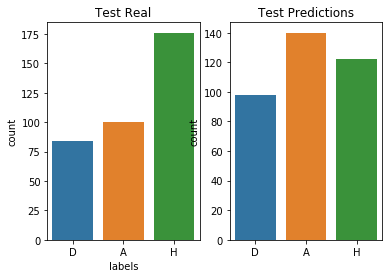

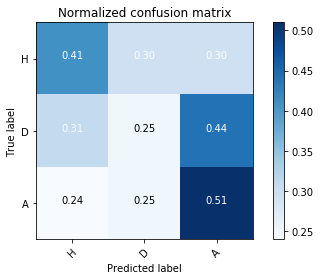


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 1.00
Accuracy of lr classifier on test set (df_stanford_real_features_leagues_21518_seasons_14_15.csv): 0.47

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.45

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


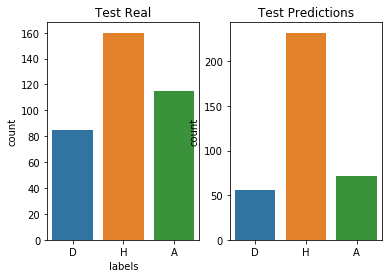

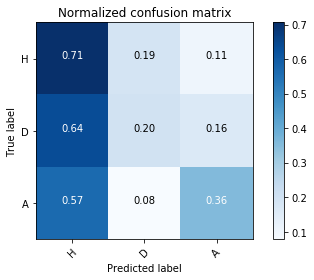


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 1.00
Accuracy of lr classifier on test set (df_stanford_real_features_leagues_21518_seasons_13_14.csv): 0.50

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


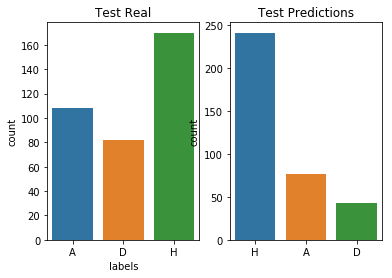

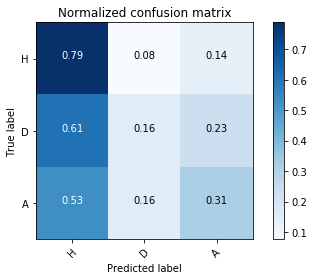


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 1.00
Accuracy of lr classifier on test set (df_stanford_real_features_leagues_21518_seasons_12_13.csv): 0.48

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


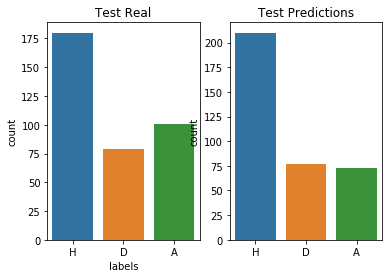

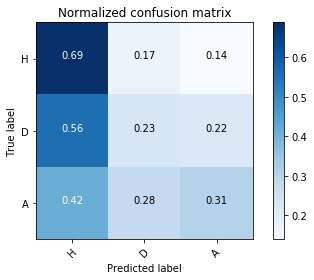


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 1.00
Accuracy of lr classifier on test set (df_stanford_real_features_leagues_21518_seasons_11_12.csv): 0.47

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.44

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


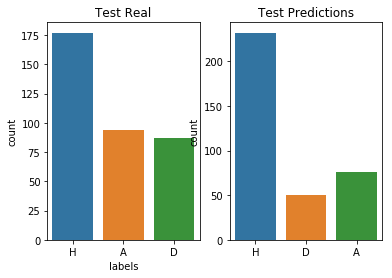

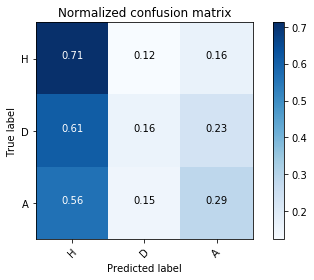


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 1.00
Accuracy of lr classifier on test set (df_stanford_real_features_leagues_21518_seasons_10_11.csv): 0.47

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


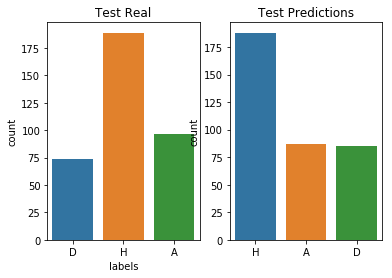

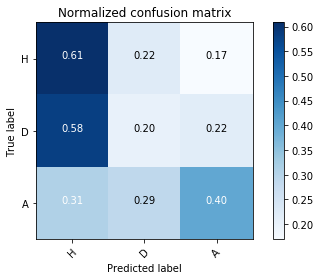

KeyboardInterrupt: 

In [4]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]

datasets = ['stanford_real_features','stanford_real_features_AfterFE','stanford_fifa_features','stanford_fifa_features_AfterFE','merge_df_stanford_fifa_features_df_stanford_real_features','stanford_fifa_features_SMOTETomek','stanford_real_features_SMOTETomek','stanford_fifa_features_AfterFE_SMOTETomek','stanford_real_features_AfterFE_SMOTETomek']
# datasets = ['stanford_fifa_features_AfterFE_SMOTETomek']


res_total = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])


for dataset in datasets:

    models = {
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression' : LogisticRegression(),
    }

    params = {
        'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8] },
        'RandomForestClassifier': { 'n_estimators': [512] },
        'AdaBoostClassifier':  { 'n_estimators': [512] },
        'GradientBoostingClassifier': { 'n_estimators': [256], 'learning_rate': [0.2,0.8, 1.0] },
        'LogisticRegression': {'penalty': ['l2'], 'C' : [0.15,1,2,5]},
    }


#     models = {
#     'RandomForestClassifier': RandomForestClassifier()
#     }

#     params = {
#         'RandomForestClassifier': { 'n_estimators': [512] }
#     }

    keys = models.keys()
    cv=3
    n_jobs=6
    verbose=1
    scoring=None
    refit=False


    from sklearn.metrics import log_loss
    from sklearn.model_selection import ParameterGrid

    res_all = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])

    for key in keys:
        print('keys',keys)
        print("Running GridSearch for %s." % key)
        model = models[key]

        params_2 = params[key]
        params_2_list = list(ParameterGrid(params_2))
        print('model: ',model)
        for i in range(len(params_2_list)):
            model = model.set_params(**params_2_list[i])
            print('model: ',model)

            import warnings
            with warnings.catch_warnings():
            # ignore all caught warnings
                warnings.filterwarnings("ignore")
                results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=model,classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False],feature_importance=False)
                res_all.loc[f'{key}_{params_2_list[i]}',:] = avg_results_lr.loc[0,['avg_train_acc','avg_test_acc','avg_f1_scores']]
                res_all.loc[f'{key}_{params_2_list[i]}','dataset'] = dataset
    res_all = res_all.sort_values(['avg_f1_scores','avg_test_acc'], ascending=False)
    display(res_all)
    res_total = pd.concat([res_total, res_all])
    





In [7]:
res_total

avg_train_acc avg_test_acc  \
GradientBoostingClassifier_{'learning_rate': 0....       0.99636     0.480536   
RandomForestClassifier_{'n_estimators': 512}                   1     0.536938   
LogisticRegression_{'C': 2, 'penalty': 'l2'}             0.54117     0.531374   
XGBClassifier_{'learning_rate': 0.8, 'n_estimat...             1     0.468212   
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.541568     0.529387   
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}         0.541038     0.530183   
LogisticRegression_{'C': 1, 'penalty': 'l2'}            0.541303     0.528197   
GradientBoostingClassifier_{'learning_rate': 1....             1     0.465864   
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...      0.999934      0.47537   
GradientBoostingClassifier_{'learning_rate': 0....             1     0.454704   
AdaBoostClassifier_{'n_estimators': 512}                 0.67077     0.469422   
LogisticRegression_{'C': 2, 'penalty': 'l2'}            0.553812      0.52657   
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}         0.553282     0.526574   
GradientBoostingClassifier_{'learning_rate': 1....             1     0.466997   
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.553017     0.524585   
LogisticRegression_{'C': 1, 'penalty': 'l2'}            0.553415     0.523792   
GradientBoostingClassifier_{'learning_rate': 0....      0.998742     0.482917   
RandomForestClassifier_{'n_estimators': 512}                   1     0.534548   
XGBClassifier_{'learning_rate': 0.8, 'n_estimat...             1     0.477365   
GradientBoostingClassifier_{'learning_rate': 0....             1     0.461453   
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...             1     0.478527   
AdaBoostClassifier_{'n_estimators': 512}                0.690362     0.470622   
LogisticRegression_{'C': 1, 'penalty': 'l2'}            0.569772     0.531344   
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}         0.569836     0.531741   
LogisticRegression_{'C': 2, 'penalty': 'l2'}            0.569521     0.531355   
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.569332     0.530968   
XGBClassifier_{'learning_rate': 0.8, 'n_estimat...             1     0.497101   
GradientBoostingClassifier_{'learning_rate': 0....      0.997609     0.504286   
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...             1     0.506942   
RandomForestClassifier_{'n_estimators': 512}                   1     0.551061   
GradientBoostingClassifier_{'learning_rate': 0....             1     0.488087   
GradientBoostingClassifier_{'learning_rate': 1....             1     0.472577   
AdaBoostClassifier_{'n_estimators': 512}                0.701463     0.456157   
LogisticRegression_{'C': 1, 'penalty': 'l2'}             0.59985     0.534818   
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}         0.599787     0.534046   
LogisticRegression_{'C': 2, 'penalty': 'l2'}             0.59966     0.531383   
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.598969     0.531003   
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...             1     0.516356   
XGBClassifier_{'learning_rate': 0.8, 'n_estimat...             1     0.503936   
GradientBoostingClassifier_{'learning_rate': 0....       0.99956     0.506452   
RandomForestClassifier_{'n_estimators': 512}                   1      0.55147   
GradientBoostingClassifier_{'learning_rate': 0....             1     0.487353   
GradientBoostingClassifier_{'learning_rate': 1....             1     0.478235   
AdaBoostClassifier_{'n_estimators': 512}                0.722543     0.468873   
XGBClassifier_{'learning_rate': 0.2, 'n_estimat...             1     0.513152   
LogisticRegression_{'C': 0.15, 'penalty': 'l2'}         0.581204      0.52931   
LogisticRegression_{'C': 5, 'penalty': 'l2'}            0.581469     0.526526   
LogisticRegression_{'C': 1, 'penalty': 'l2'}            0.581868     0.525331   
GradientBoostingClassifier_{'learning_rate': 0....      0.999867     0.509879   
L

In [4]:
res_total2 

NameError: name 'res_total2' is not defined

keys dict_keys(['RandomForestClassifier'])
Running GridSearch for RandomForestClassifier.
model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

>>>  CLASSIFIER: lr

---------------------
**

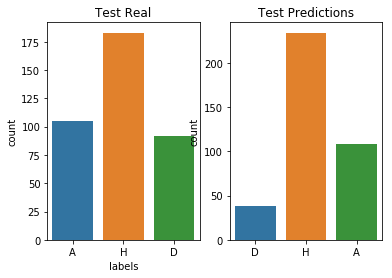

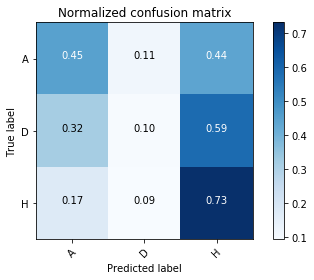


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 0.95
Accuracy of lr classifier on test set (df_stanford_fifa_features_AfterFE_SMOTETomek_leagues_21518_seasons_14_15.csv): 0.53

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.48

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


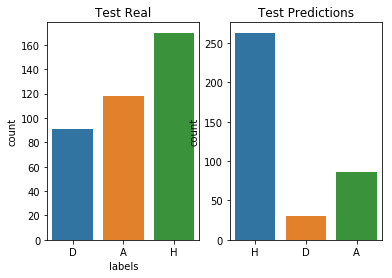

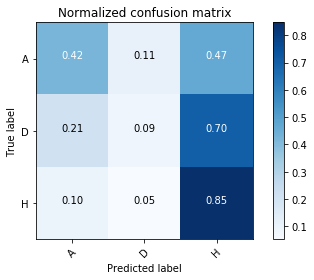


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 0.96
Accuracy of lr classifier on test set (df_stanford_fifa_features_AfterFE_SMOTETomek_leagues_21518_seasons_13_14.csv): 0.53

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.46

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


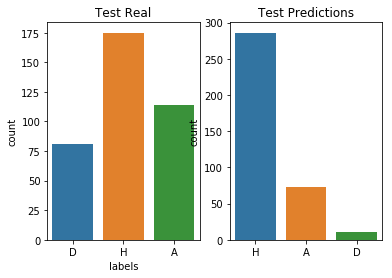

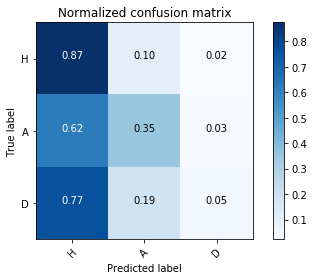


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 0.96
Accuracy of lr classifier on test set (df_stanford_fifa_features_AfterFE_SMOTETomek_leagues_21518_seasons_12_13.csv): 0.53

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


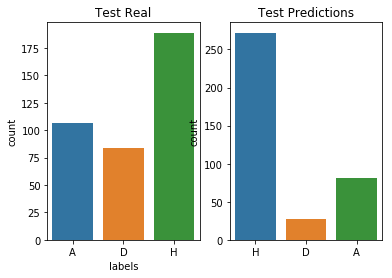

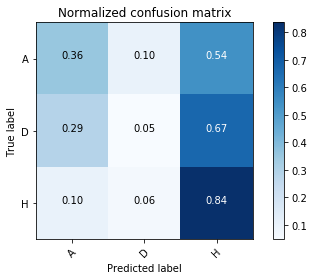


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 0.96
Accuracy of lr classifier on test set (df_stanford_fifa_features_AfterFE_SMOTETomek_leagues_21518_seasons_11_12.csv): 0.53

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.45

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


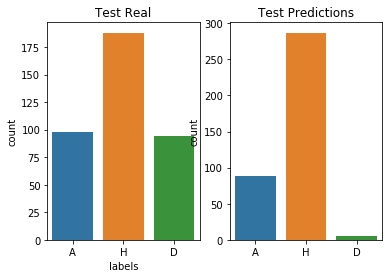

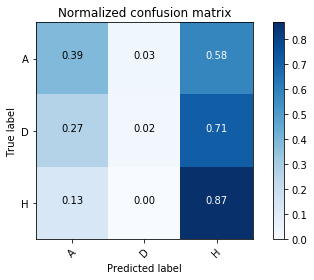


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 0.97
Accuracy of lr classifier on test set (df_stanford_fifa_features_AfterFE_SMOTETomek_leagues_21518_seasons_10_11.csv): 0.59

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.56

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


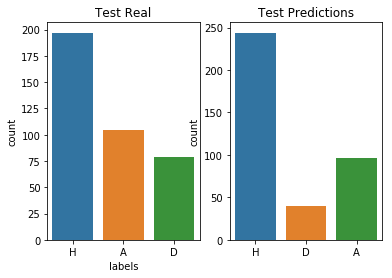

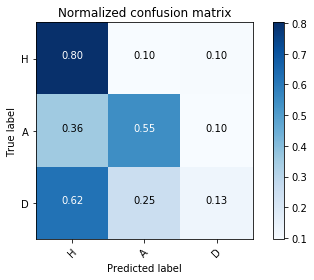


>>>  CLASSIFIER: lr

---------------------
*** ACCURACY ***
---------------------
Accuracy of lr classifier on training set: 0.96
Accuracy of lr classifier on test set (df_stanford_fifa_features_AfterFE_SMOTETomek_leagues_21518_seasons_09_10.csv): 0.52

---------------------
*** F1 SCORE ***
---------------------
F1 Score of lr classifier on test set: 0.53

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


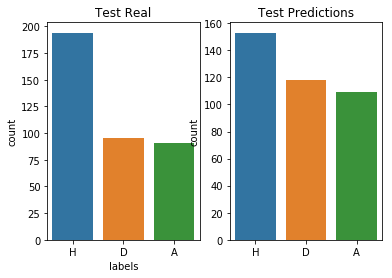

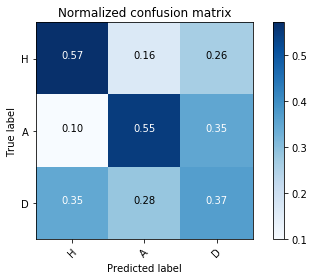

.......................
.......................

Avg Accuracy on training set: 0.9591509273578289
Avg Accuracy on testing set: 0.5334050022010027
Feature importance:
Normalized confusion matrix


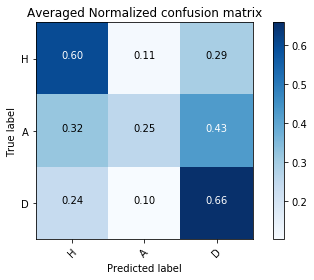

avg_train_acc  avg_test_acc  avg_f1_scores
0       0.959151      0.533405       0.489859

avg_train_acc avg_test_acc  \
RandomForestClassifier_{'max_depth': 10, 'min_s...      0.959151     0.533405   

                                                   avg_f1_scores  \
RandomForestClassifier_{'max_depth': 10, 'min_s...      0.489859   

                                                                                      dataset  
RandomForestClassifier_{'max_depth': 10, 'min_s...  stanford_fifa_features_AfterFE_SMOTETomek

In [9]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]

datasets = ['stanford_real_features','stanford_real_features_AfterFE','stanford_fifa_features','stanford_fifa_features_AfterFE','merge_df_stanford_fifa_features_df_stanford_real_features','stanford_fifa_features_SMOTETomek','stanford_real_features_SMOTETomek','stanford_fifa_features_AfterFE_SMOTETomek','stanford_real_features_AfterFE_SMOTETomek','merge_df_stanford_fifa_features_df_stanford_real_features']
datasets = ['merge_df_stanford_fifa_features_AfterFE_SMOTETomek_df_stanford_real_features_AfterFE_SMOTETomek']
datasets = ['stanford_fifa_features_AfterFE_SMOTETomek']  

res_total2 = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])


for dataset in datasets:

    models = {
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression' : LogisticRegression(),
    }

    params = {
        'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8]},
        'RandomForestClassifier': { 'n_estimators': [50], 'n_jobs':[6]},
        'AdaBoostClassifier':  { 'n_estimators': [512] },
        'GradientBoostingClassifier': { 'n_estimators': [256], 'learning_rate': [0.2,0.8, 1.0] },
        'LogisticRegression': {'penalty': ['l2'], 'C' : [0.15,1,2,5]},
    }


#     models = {
#     'RandomForestClassifier': RandomForestClassifier()
#     }

#     params = {
#         'RandomForestClassifier': { 'n_estimators': [6,12,50,100], 'max_depth':[5,10,None], 'min_samples_split':[2,10], 'n_jobs':[6]   }
#     }
    
    models = {
    'RandomForestClassifier': RandomForestClassifier()
    }

    params = {
        'RandomForestClassifier': { 'n_estimators': [50], 'min_samples_split':[2], 'n_jobs':[-1], 'max_depth':[10]  }
    }    
    
    keys = models.keys()
    cv=3
    n_jobs=6
    verbose=1
    scoring=None
    refit=False


    from sklearn.metrics import log_loss
    from sklearn.model_selection import ParameterGrid

    res_all = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])

    for key in keys:
        print('keys',keys)
        print("Running GridSearch for %s." % key)
        model = models[key]

        params_2 = params[key]
        params_2_list = list(ParameterGrid(params_2))
        print('model: ',model)
        for i in range(len(params_2_list)):
            model = model.set_params(**params_2_list[i])
            print('model: ',model)

            import warnings
            with warnings.catch_warnings():
            # ignore all caught warnings
                warnings.filterwarnings("ignore")
                results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=model,classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False],feature_importance=False)
                res_all.loc[f'{key}_{params_2_list[i]}',:] = avg_results_lr.loc[0,['avg_train_acc','avg_test_acc','avg_f1_scores']]
                res_all.loc[f'{key}_{params_2_list[i]}','dataset'] = dataset
    res_all = res_all.sort_values(['avg_f1_scores','avg_test_acc'], ascending=False)
    display(res_all)
    res_total2 = pd.concat([res_total2, res_all])
    


In [1]:
res_total2

NameError: name 'res_total2' is not defined

In [15]:
len(['volleys_away_categories_(73.75, 82.5_','strength_home_categories_(60.599000000000004, 73.6_',
'gk_handling_away_categories_(70.0, 72.0_',
'acceleration_away_categories_(70.6, 73.6_',
'long_passing_home_categories_(77.2, 79.4_',
'reactions_away_categories_(77.36, 79.0_',
'jumping_away_categories_(75.8, 77.88_',
'aggression_away_categories_(79.32, 80.4_',
'jumping_home_categories_(76.0, 78.2_',
'long_shots_away_categories_(80.4, 86.2_',
'gk_diving_home_categories_(73.0, 76.0_',
'long_passing_home_categories_(80.24, 89.4_',
'free_kick_accuracy_home_categories_(73.25, 74.25_',
'penalties_away_categories_(72.96, 75.2_',
'sprint_speed_home_categories_(71.2, 73.6_',
'reactions_home_categories_(76.8, 78.2_',
'aggression_away_categories_(81.8, 87.6_',
'volleys_away_categories_(75.3, 84.0_',
'penalties_home_categories_(80.8, 89.2_',
'penalties_home_categories_(67.79899999999999, 74.6_',
'gk_kicking_home_categories_(75.0, 79.0_',
'crossing_away_categories_(73.5, 75.75_', 'long_passing_home',
'free_kick_accuracy_home_categories',
'interceptions_away_categories_(76.0, 78.2_',
'gk_kicking_away_categories_(11.999, 66.0_',
'gk_reflexes_away_categories_(78.6, 82.0_',
'short_passing_away_categories_(75.0, 77.5_',
'standing_tackle_away_categories_(73.8, 76.0_',
'dribbling_home_categories_(80.5, 86.75_',
'agility_home_categories_(77.88, 82.8_',
'sprint_speed_away_categories_(74.4, 77.04_',
'sprint_speed_home_categories_(74.68, 77.8_',
'long_passing_away_categories_(72.32, 74.6_',
'gk_positioning_home_categories_(50.999, 68.0_',
'gk_positioning_home_categories_(23.999, 73.0_',
'interceptions_away_categories_(70.79899999999999, 77.4_',
'long_shots_home_categories_(80.8, 86.2_',
'short_passing_home_categories_(77.5, 79.25_',
'aggression_home_categories_(78.0, 79.4_',
'balance_away_categories_(73.79899999999999, 78.0_',
'gk_reflexes_home_categories_(59.999, 73.6_',
'heading_accuracy_away_categories_(74.5, 78.75_',
'id_categories_(21973.8, 22049.6_', 'id_categories_(22049.6, 22125.4_',
'gk_reflexes_home_categories_(12.999, 74.0_',
'vision_away_categories_(67.399, 74.2_',
'shot_power_home_categories_(78.16, 81.2_',
'aggression_home_categories_(79.4, 80.2_',
'gk_reflexes_home_categories_(82.0, 87.0_',
'strength_away_categories_(75.8, 78.0_',
'long_shots_home_categories_(76.92, 78.6_',
'aggression_home_categories_(81.4, 86.8_',
'sliding_tackle_home_categories_(63.999, 71.0_',
'gk_positioning_away_categories_(76.0, 78.0_',
'dribbling_home_categories_(78.8, 84.0_',
'gk_positioning_away_categories_(73.0, 77.0_', 'mentality_home',
'gk_kicking_home_categories_(68.0, 70.0_',
'positioning_away_categories_(55.399, 69.0_',
'gk_kicking_away_categories_(73.0, 77.0_',
'standing_tackle_home_categories_(74.0, 76.4_',
'sprint_speed_away_categories_(71.4, 73.8_',
'interceptions_away_categories_(81.8, 86.8_',
'heading_accuracy_away_categories_(78.5, 85.25_',
'finishing_away_categories_(74.5, 85.75_',
'reactions_home_categories_(71.59899999999999, 75.96_',
'crossing_home_categories_(77.75, 80.75_',
'strength_away_categories_(81.44, 87.8_',
'aggression_home_categories_(71.79899999999999, 76.6_',
'sliding_tackle_home_categories_(64.6, 67.4_',
'long_shots_home_categories_(81.6, 86.6_',
'jumping_away_categories_(76.32, 78.6_',
'jumping_home_categories_(78.4, 81.4_',
'free_kick_accuracy_home_categories_(65.749, 71.7_',
'sliding_tackle_away_categories_(72.44, 80.4_',
'gk_positioning_home_categories_(51.999, 71.0_',
'acceleration_home_categories_(55.399, 65.76_',
'short_passing_home_categories_(76.5, 78.75_', 'strength_away',
'marking_away_categories_(74.8, 79.08_',
'curve_away_categories_(78.0, 80.0_',
'vision_away_categories_(78.0, 80.6_',
'agility_home_categories_(79.0, 82.4_',
'id_categories_(23113.8, 23189.6_',
'heading_accuracy_away_categories_(58.999, 70.2_',
'ball_control_home_categories_(77.8, 80.2_',
'agility_away_categories_(77.0, 78.6_',
'gk_positioning_away_categories_(74.0, 76.0_',
'gk_positioning_home_categories_(76.0, 80.0_',
'ball_control_away_categories_(77.6, 79.6_',
'vision_away_categories_(82.6, 86.0_',
'strength_away_categories_(74.6, 76.8_',
'interceptions_away_categories_(75.6, 77.4_',
'long_shots_home_categories_(77.6, 79.2_',
'interceptions_away_categories_(77.4, 79.68_',
'gk_positioning_away_categories_(56.999, 71.0_',
'balance_away_categories_(78.2, 79.8_',
'crossing_home_categories_(80.75, 87.0_',
'aggression_away_categories_(82.6, 88.0_',
'long_passing_home_categories_(75.12, 78.0_',
'sliding_tackle_away_categories_(79.04, 91.0_',
'dribbling_away_categories_(73.1, 76.3_',
'short_passing_away_categories_(83.05, 91.75_',
'gk_diving_away_categories_(55.999, 73.0_',
'long_shots_away_categories_(69.199, 75.8_',
'free_kick_accuracy_home_categories_(79.683, 88.75_',
'gk_handling_away_categories_(79.0, 89.0_',
'long_shots_away_categories_(75.8, 77.6_',
'free_kick_accuracy_home_categories_(65.249, 73.25_',
'long_passing_home_categories_(66.199, 73.6_',
'interceptions_home_categories_(81.84, 88.4_',
'acceleration_home_categories_(68.6, 71.0_',
'curve_home_categories_(75.0, 76.75_',
'gk_handling_home_categories_(70.0, 72.0_',
'marking_home_categories_(79.2, 87.0_',
'gk_handling_home_categories_(76.0, 80.0_',
'long_shots_home_categories_(75.4, 76.92_',
'sliding_tackle_home_categories_(58.399, 66.16_',
'acceleration_home_categories_(52.599000000000004, 63.6_',
'penalties_away_categories_(78.08, 80.84_',
'gk_reflexes_home_categories_(79.0, 84.0_',
'strength_away_categories_(81.0, 85.8_',
'gk_handling_home_categories_(74.0, 82.0_',
'sliding_tackle_home_categories_(79.4, 91.0_',
'volleys_away_categories_(74.25, 81.5_',
'acceleration_away_categories_(64.6, 68.0_',
'acceleration_away_categories_(57.999, 64.6_',
'short_passing_home_categories_(75.75, 77.4_',
'penalties_away_categories_(77.0, 79.04_',
'balance_away_categories_(75.8, 78.2_',
'sprint_speed_away_categories_(75.2, 77.6_',
'marking_away_categories_(76.4, 79.4_',
'positioning_away_categories_(59.399, 67.2_',
'finishing_home_categories_(67.5, 69.5_',
'jumping_away_categories_(81.0, 90.6_', 'jumping_home',
'gk_reflexes_home_categories_(84.0, 93.0_',
'stamina_home_categories_(77.0, 79.4_',
'jumping_home_categories_(67.79899999999999, 74.6_',
'gk_positioning_home_categories_(74.0, 80.0_',
'acceleration_away_categories_(71.4, 74.8_',
'id_categories_(23417.999, 23494.8_',
'long_passing_home_categories_(72.6, 75.4_',
'shot_power_home_categories_(78.0, 79.4_',
'marking_home_categories_(70.8, 73.52_',
'dribbling_home_categories_(65.499, 72.5_', 'long_shots_home',
'gk_positioning_away_categories_(75.0, 76.0_',
'gk_kicking_home_categories_(70.0, 73.0_',
'balance_away_categories_(82.2, 88.4_',
'vision_home_categories_(77.0, 78.8_',
'ball_control_away_categories_(71.6, 74.4_',
'dribbling_home_categories_(72.5, 75.0_',
'gk_handling_away_categories_(72.0, 75.0_',
'positioning_away_categories_(74.08, 78.4_',
'dribbling_home_categories_(76.0, 78.25_',
'penalties_away_categories_(76.6, 78.08_',
'volleys_home_categories_(69.25, 71.5_',
'balance_home_categories_(78.2, 79.4_',
'strength_home_categories_(81.2, 86.6_',
'gk_handling_away_categories_(79.0, 88.0_',
'sprint_speed_away_categories_(77.04, 86.4_',
'shot_power_away_categories_(67.199, 73.72_',
'strength_away_categories_(63.399, 75.0_',
'volleys_home_categories_(71.5, 77.0_',
'finishing_away_categories_(71.5, 74.25_',
'balance_away_categories_(78.0, 79.2_',
'marking_home_categories_(83.4, 90.8_',
'long_shots_away_categories_(78.6, 80.4_',
'shot_power_away_categories_(77.6, 79.4_',
'long_passing_away_categories_(63.799, 72.0_',
'shot_power_home_categories_(75.4, 78.0_',
'gk_handling_home_categories_(75.0, 79.0_',
'marking_away_categories_(75.0, 79.4_',
'volleys_away_categories_(55.249, 66.75_',
'marking_away_categories_(74.56, 76.6_',
'reactions_home_categories_(83.8, 89.6_',
'vision_home_categories_(77.6, 80.0_',
'gk_diving_away_categories_(73.0, 76.0_',
'free_kick_accuracy_home_categories_(79.25, 89.75_',
'stamina_home_categories_(77.4, 78.8_',
'gk_positioning_away_categories_(75.0, 77.0_',
'vision_home_categories_(75.4, 77.6_',
'acceleration_home_categories_(68.2, 72.4_',
'long_passing_home_categories_(77.4, 80.24_',
'vision_home_categories_(68.59899999999999, 74.0_',
'reactions_away_categories_(70.59899999999999, 77.36_',
'jumping_away_categories_(82.2, 89.2_',
'gk_diving_away_categories_(80.0, 85.0_',
'gk_diving_home_categories_(12.999, 73.0_',
'short_passing_away_categories_(68.499, 75.0_',
'dribbling_away_categories_(64.249, 73.7_',
'sprint_speed_away_categories_(62.399, 71.2_',
'interceptions_home_categories_(72.999, 77.6_',
'gk_positioning_away_categories_(76.0, 80.0_',
'heading_accuracy_away_categories_(73.0, 74.75_',
'sliding_tackle_away_categories_(64.4, 67.0_'])

198

In [14]:
len(['away_team_weekday_year_elche_5_2015',
'AF_mean_categories_(17.778, 24.0_',
'away_team_weekday_year_levante_6_2010',
'AR_mean_categories_(0.133, 0.214_',
'away_team_weekday_year_valencia_5_2012',
'home_team_weekday_year_madrid_6_2009',
'away_team_weekday_year_levante_4_2013',
'away_team_weekday_year_espanyol_3_2015',
'away_team_weekday_year_elche_4_2013',
'away_team_weekday_year_getafe_3_2013',
'AY_mean_categories_(3.0, 3.333_',
'home_team_weekday_year_granada_2_2015',
'HC_mean_categories_(7.721, 14.0_', 'AR_mean_categories_(0.214, 0.3_',
'A_FTR_H_mean_categories_(0.25, 0.434_',
'home_team_weekday_year_coruña_4_2013',
'AF_mean_categories_(5.999, 11.933_',
'AY_mean_categories_(2.963, 3.402_',
'AS_mean_categories_(11.4, 12.333_',
'away_team_weekday_year_sociedad_1_2013',
'AS_mean_categories_(11.421, 12.559_',
'AF_mean_categories_(6.999, 12.0_',
'home_team_weekday_year_osasuna_4_2013',
'away_team_weekday_year_coruña_5_2013',
'A_FTR_D_mean_categories_(0.4, 1.0_',
'home_team_weekday_year_coruña_0_2012',
'AR_mean_categories_(-0.001, 0.139_',
'away_team_weekday_year_coruña_5_2012',
'away_team_weekday_year_sociedad_0_2011',
'H_HTR_A_mean_categories_(-0.001, 0.143_',
'HS_mean_categories_(3.999, 12.139_',
'away_team_weekday_year_sociedad_0_2014',
'home_team_weekday_year_osasuna_4_2014',
'AF_mean_categories_(7.999, 13.391_',
'AR_mean_categories_(-0.001, 0.182_',
'home_team_weekday_year_atlbilbao_0_2010',
'A_FTR_D_mean_categories_(0.269, 0.333_',
'H_FTR_A_mean_categories_(-0.001, 0.25_',
'home_team_weekday_year_atlmadrid_0_2010',
'home_team_weekday_year_almería_6_2009',
'away_team_weekday_year_mallorca_2_2010',
'home_team_weekday_year_atlmadrid_1_2013',
'away_team_weekday_year_betis_3_2013',
'AST_mean_categories_(4.789, 9.0_',
'away_team_weekday_year_córdoba_6_2014',
'away_team_weekday_year_córdoba_6_2015',
'away_team_weekday_year_córdoba_0_2015',
'A_FTR_A_mean_categories_(0.182, 0.273_',
'HR_mean_categories_(0.167, 0.268_',
'A_FTR_A_mean_categories_(0.235, 0.333_',
'home_team_weekday_year_atlmadrid_2_2010',
'A_FTR_A_mean_categories_(0.308, 0.429_',
'home_team_weekday_year_almería_6_2011',
'away_team_weekday_year_osasuna_5_2014',
'away_team_weekday_year_osasuna_6_2009',
'A_FTR_D_mean_categories_(-0.001, 0.0658_',
'HS_mean_categories_(13.187, 14.61_',
'away_team_weekday_year_madrid_6_2009',
'HS_mean_categories_(13.5, 14.5_',
'home_team_weekday_year_villarreal_2_2015',
'A_FTR_D_mean_categories_(-0.001, 0.167_',
'home_team_weekday_year_almería_6_2015',
'home_team_weekday_year_almería_2_2011',
'home_team_weekday_year_espanyol_0_2011',
'A_FTR_D_mean_categories_(0.167, 0.222_',
'AR_mean_categories_(0.364, 2.0_', 'home_team_name_id_xerez',
'away_team_weekday_year_córdoba_1_2015',
'AY_mean_categories_(2.75, 3.169_',
'home_team_weekday_year_atlbilbao_5_2009',
'away_team_weekday_year_getafe_5_2014',
'away_team_weekday_year_coruña_2_2010',
'away_team_weekday_year_valencia_6_2009',
'A_HTR_H_mean_categories_(0.164, 0.333_', 'away_team_name_id_hércules',
'away_team_weekday_year_villarreal_2_2014',
'HST_mean_categories_(3.5, 4.0_', 'HTAG_mean_categories_(0.7, 2.5_',
'HST_mean_categories_(4.465, 5.333_', 'AY_mean_categories_(2.0, 2.5_',
'A_HTR_H_mean_categories_(0.4, 0.5_',
'HTAG_mean_categories_(0.778, 3.0_',
'A_HTR_H_mean_categories_(0.471, 0.562_',
'away_team_weekday_year_celta_4_2013',
'home_team_weekday_year_madrid_5_2009',
'away_team_weekday_year_málaga_5_2009',
'HTHG_mean_categories_(0.56, 0.824_',
'H_HTR_H_mean_categories_(0.602, 1.0_',
'H_HTR_H_mean_categories_(0.571, 1.0_',
'away_team_weekday_year_granada_2_2014',
'FTAG_mean_categories_(0.5, 0.8_', 'FTAG_mean_categories_(1.4, 5.0_',
'HST_mean_categories_(3.822, 4.571_',
'away_team_weekday_year_granada_0_2014',
'away_team_weekday_year_granada_0_2013',
'FTAG_mean_categories_(1.167, 1.455_',
'home_team_weekday_year_osasuna_0_2010',
'HTAG_mean_categories_(0.5, 0.7_',
'HTAG_mean_categories_(0.272, 0.381_',
'away_team_weekday_year_celta_3_2013',
'HC_mean_categories_(0.999, 4.5_', 'HTAG_mean_categories_(-0.001, 0.2_',
'home_team_weekday_year_valladolid_2_2009',
'away_team_weekday_year_celta_2_2015',
'HY_mean_categories_(-0.001, 1.875_', 'HY_mean_categories_(2.0, 2.273_',
'AY_mean_categories_(2.632, 2.963_',
'AF_mean_categories_(15.667, 25.0_',
'away_team_weekday_year_celta_2_2014',
'A_HTR_D_mean_categories_(0.583, 1.0_',
'away_team_weekday_year_getafe_4_2012',
'HST_mean_categories_(4.693, 5.605_',
'home_team_weekday_year_gijon_5_2009',
'away_team_weekday_year_celta_4_2012',
'away_team_weekday_year_hércules_6_2011',
'home_team_weekday_year_celta_0_2014',
'away_team_weekday_year_coruña_5_2009',
'HST_mean_categories_(5.393, 6.667_',
'HST_mean_categories_(5.259, 6.17_',
'HTAG_mean_categories_(0.412, 0.556_',
'away_team_weekday_year_osasuna_0_2013',
'H_FTR_A_mean_categories_(0.439, 1.0_',
'A_HTR_D_mean_categories_(0.5, 0.583_',
'away_team_weekday_year_elche_6_2014',
'H_HTR_H_mean_categories_(0.5, 1.0_',
'home_team_weekday_year_celta_6_2013',
'HS_mean_categories_(11.794, 12.6_',
'home_team_weekday_year_mallorca_6_2012',
'AY_mean_categories_(-0.001, 2.362_',
'home_team_weekday_year_sociedad_5_2013',
'away_team_weekday_year_málaga_5_2014',
'home_team_weekday_year_atlbilbao_2_2016',
'home_team_weekday_year_sociedad_6_2014',
'away_team_weekday_year_celta_1_2016', 'A_FTR_A_mean_categories',
'away_team_weekday_year_sevilla_3_2012',
'home_team_weekday_year_almería_6_2010',
'away_team_weekday_year_valencia_5_2015',
'HC_mean_categories_(1.999, 4.941_',
'home_team_weekday_year_gijon_6_2016',
'away_team_weekday_year_villarreal_6_2016',
'away_team_weekday_year_villarreal_6_2011',
'away_team_weekday_year_valencia_2_2016',
'home_team_weekday_year_mallorca_6_2010',
'home_team_weekday_year_mallorca_5_2011', 'away_team_name_id_sevilla',
'away_team_weekday_year_valencia_5_2016',
'away_team_weekday_year_betis_2_2015',
'away_team_weekday_year_villarreal_2_2015',
'home_team_weekday_year_granada_6_2012',
'home_team_weekday_year_granada_6_2013',
'away_team_weekday_year_valencia_6_2016',
'A_HTR_H_mean_categories_(0.412, 0.545_',
'away_team_weekday_year_vallecano_6_2013',
'H_HTR_H_mean_categories_(0.375, 0.5_',
'FTAG_mean_categories_(1.2, 1.5_', 'A_HTR_A_mean_categories_(0.5, 1.0_',
'home_team_weekday_year_málaga_6_2014',
'home_team_weekday_year_málaga_6_2016',
'away_team_weekday_year_sociedad_1_2015',
'home_team_weekday_year_almería_5_2014',
'A_FTR_A_mean_categories_(0.2, 0.308_',
'away_team_weekday_year_betis_0_2012',
'away_team_weekday_year_osasuna_5_2012',
'away_team_weekday_year_osasuna_6_2012',
'away_team_weekday_year_palmas_1_2016',
'home_team_weekday_year_almería_2_2010',
'home_team_weekday_year_espanyol_6_2011',
'home_team_weekday_year_sevilla_1_2011',
'home_team_weekday_year_santander_6_2011',
'away_team_weekday_year_sevilla_2_2016',
'away_team_weekday_year_celta_6_2014', 'home_team_name_id_espanyol',
'home_team_weekday_year_palmas_6_2016',
'home_team_weekday_year_palmas_5_2016', 'A_HTR_A_mean',
'home_team_weekday_year_getafe_5_2016',
'away_team_weekday_year_celta_5_2016',
'away_team_weekday_year_gijon_6_2016',
'home_team_weekday_year_villarreal_6_2015',
'away_team_weekday_year_granada_6_2014',
'AS_mean_categories_(10.0, 11.0_',
'away_team_weekday_year_coruña_6_2016',
'home_team_weekday_year_vallecano_4_2015',
'home_team_weekday_year_vallecano_4_2016',
'home_team_weekday_year_atlmadrid_1_2015',
'home_team_weekday_year_atlmadrid_1_2016',
'home_team_weekday_year_coruña_6_2010',
'HTHG_mean_categories_(0.75, 0.882_',
'HS_mean_categories_(12.6, 13.549_',
'away_team_weekday_year_madrid_6_2012',
'away_team_weekday_year_eibar_6_2016',
'away_team_weekday_year_madrid_5_2016',
'HTHG_mean_categories_(0.882, 2.308_',
'home_team_weekday_year_celta_6_2014',
'away_team_weekday_year_mallorca_5_2012',
'home_team_weekday_year_betis_6_2015',
'away_team_weekday_year_elche_5_2014', 'AST_mean_categories',
'away_team_weekday_year_madrid_5_2012',
'AR_mean_categories_(0.286, 1.0_',
'AF_mean_categories_(12.272, 13.572_',
'AR_mean_categories_(0.214, 0.286_',
'away_team_weekday_year_levante_5_2014',
'home_team_weekday_year_atlmadrid_6_2010',
'away_team_weekday_year_levante_5_2015',
'away_team_weekday_year_espanyol_6_2013',
'HS_mean_categories_(3.999, 11.794_',
'away_team_weekday_year_levante_6_2015',
'away_team_weekday_year_mallorca_5_2010',
'away_team_weekday_year_granada_6_2015',
'home_team_weekday_year_barcelona_6_2015',
'away_team_weekday_year_granada_2_2015',
'home_team_weekday_year_atlbilbao_5_2011',
'away_team_weekday_year_coruña_5_2016',
'home_team_weekday_year_atlbilbao_4_2014',
'away_team_weekday_year_mallorca_6_2011',
'home_team_weekday_year_eibar_6_2015',
'away_team_weekday_year_coruña_3_2015',
'away_team_weekday_year_celta_6_2015', 'stage_categories_(10.0, 17.0_',
'away_team_weekday_year_coruña_6_2010', 'month',
'AS_mean_categories_(11.0, 11.672_',
'away_team_weekday_year_espanyol_4_2015',
'away_team_weekday_year_getafe_6_2015',
'away_team_weekday_year_osasuna_5_2011',
'away_team_weekday_year_sociedad_1_2016',
'away_team_weekday_year_xerez_5_2010',
'home_team_weekday_year_barcelona_1_2011',
'home_team_weekday_year_barcelona_0_2010',
'home_team_weekday_year_barcelona_1_2010',
'away_team_weekday_year_xerez_2_2010',
'away_team_weekday_year_xerez_1_2010',
'away_team_weekday_year_vallecano_6_2014',
'away_team_weekday_year_vallecano_4_2015',
'home_team_weekday_year_barcelona_1_2012',
'away_team_weekday_year_villarreal_6_2015',
'away_team_weekday_year_xerez_6_2009',
'away_team_weekday_year_villarreal_6_2013',
'away_team_weekday_year_villarreal_6_2012',
'home_team_weekday_year_barcelona_1_2013',
'away_team_weekday_year_villarreal_6_2010',
'away_team_weekday_year_villarreal_6_2009',
'away_team_weekday_year_villarreal_5_2016',
'home_team_weekday_year_barcelona_1_2015',
'away_team_weekday_year_villarreal_5_2015',
'away_team_weekday_year_villarreal_6_2014',
'away_team_weekday_year_zaragoza_0_2013',
'away_team_weekday_year_xerez_6_2010',
'away_team_weekday_year_zaragoza_0_2010',
'away_team_weekday_year_zaragoza_5_2011',
'away_team_weekday_year_zaragoza_5_2010',
'away_team_weekday_year_zaragoza_5_2009',
'home_team_weekday_year_atlmadrid_6_2015',
'away_team_weekday_year_vallecano_4_2013',
'away_team_weekday_year_zaragoza_4_2013',
'away_team_weekday_year_zaragoza_3_2012',
'away_team_weekday_year_vallecano_4_2014',
'away_team_weekday_year_zaragoza_3_2011',
'away_team_weekday_year_zaragoza_3_2009',
'away_team_weekday_year_zaragoza_2_2012',
'away_team_weekday_year_zaragoza_2_2011',
'home_team_weekday_year_atlmadrid_6_2016',
'away_team_weekday_year_zaragoza_2_2010',
'away_team_weekday_year_villarreal_5_2014',
'away_team_weekday_year_zaragoza_0_2012',
'away_team_weekday_year_zaragoza_0_2011',
'home_team_weekday_year_barcelona_2_2010',
'away_team_weekday_year_villarreal_5_2011',
'home_team_weekday_year_barcelona_2_2012',
'away_team_weekday_year_vallecano_6_2011',
'home_team_weekday_year_barcelona_5_2014',
'home_team_weekday_year_barcelona_5_2015',
'away_team_weekday_year_vallecano_5_2014',
'away_team_weekday_year_villarreal_1_2012',
'away_team_weekday_year_villarreal_1_2010',
'away_team_weekday_year_vallecano_5_2015',
'away_team_weekday_year_villarreal_0_2014',
'away_team_weekday_year_villarreal_0_2013',
'away_team_weekday_year_vallecano_5_2016',
'away_team_weekday_year_vallecano_6_2012',
'home_team_weekday_year_barcelona_2_2014',
'away_team_weekday_year_villarreal_0_2011',
'home_team_weekday_year_barcelona_6_2013',
'home_team_weekday_year_barcelona_5_2016',
'home_team_weekday_year_barcelona_6_2009',
'away_team_weekday_year_villarreal_0_2010',
'home_team_weekday_year_barcelona_6_2012',
'home_team_weekday_year_barcelona_6_2010',
'away_team_weekday_year_vallecano_6_2016',
'home_team_weekday_year_barcelona_6_2011',
'away_team_weekday_year_villarreal_2_2010',
'away_team_weekday_year_villarreal_2_2011',
'home_team_weekday_year_barcelona_6_2014',
'home_team_weekday_year_barcelona_5_2013',
'away_team_weekday_year_villarreal_5_2013',
'away_team_weekday_year_vallecano_4_2016',
'away_team_weekday_year_villarreal_5_2012',
'away_team_weekday_year_vallecano_6_2015',
'home_team_weekday_year_barcelona_2_2015',
'home_team_weekday_year_betis_0_2013',
'away_team_weekday_year_villarreal_5_2010',
'home_team_weekday_year_barcelona_4_2013',
'away_team_weekday_year_villarreal_5_2009',
'home_team_weekday_year_barcelona_5_2009',
'home_team_weekday_year_barcelona_5_2010',
'away_team_weekday_year_vallecano_5_2011',
'away_team_weekday_year_villarreal_3_2014',
'away_team_weekday_year_villarreal_2_2016',
'home_team_weekday_year_barcelona_5_2011',
'home_team_weekday_year_barcelona_6_2016',
'home_team_weekday_year_barcelona_5_2012',
'away_team_weekday_year_vallecano_5_2012',
'away_team_weekday_year_vallecano_5_2013',
'home_team_weekday_year_atlmadrid_6_2014',
'home_team_weekday_year_atlbilbao_4_2013',
'away_team_weekday_year_zaragoza_5_2012', 'home_team_weekday_year',
'home_team_weekday_year_atlbilbao_6_2015',
'home_team_weekday_year_atlbilbao_6_2016',
'home_team_weekday_year_atlmadrid_0_2011',
'home_team_weekday_year_almería_5_2015',
'home_team_weekday_year_atlmadrid_2_2009',
'home_team_weekday_year_almería_5_2013',
'home_team_weekday_year_almería_5_2011',
'home_team_weekday_year_atlmadrid_2_2011',
'home_team_weekday_year_almería_5_2010',
'home_team_weekday_year_almería_4_2015',
'home_team_weekday_year_atlmadrid_2_2012',
'home_team_weekday_year_almería_4_2014',
'home_team_weekday_year_atlmadrid_2_2014',
'home_team_weekday_year_almería_4_2013',
'home_team_weekday_year_almería_3_2014',
'home_team_weekday_year_almería_3_2011',
'home_team_weekday_year_almería_3_2010',
'home_team_weekday_year_atlmadrid_3_2010',
'home_team_weekday_year_almería_2_2014',
'home_team_weekday_year_atlmadrid_4_2012',
'home_team_weekday_year_almería_1_2010',
'home_team_weekday_year_almería_0_2015',
'home_team_weekday_year_almería_0_2014',
'home_team_weekday_year_almería_6_2013',
'home_team_weekday_year_almería_6_2014',
'home_team_weekday_year_atlbilbao_6_2014',
'home_team_weekday_year_atlbilbao_2_2015',
'home_team_weekday_year_atlbilbao_3_2013',
'home_team_weekday_year_atlbilbao_5_2010',
'home_team_weekday_year_atlbilbao_3_2011',
'home_team_weekday_year_atlbilbao_5_2012',
'home_team_weekday_year_atlbilbao_5_2013',
'home_team_weekday_year_atlbilbao_5_2014',
'home_team_weekday_year_atlbilbao_5_2015',
'home_team_weekday_year_atlbilbao_5_2016',
'home_team_weekday_year_atlbilbao_6_2009',
'home_team_weekday_year_atlbilbao_6_2010',
'home_team_weekday_year_atlbilbao_6_2011',
'home_team_weekday_year_atlbilbao_6_2013',
'home_team_weekday_year_atlbilbao_6_2012',
'home_team_weekday_year_atlbilbao_2_2012',
'home_team_weekday_year_atlbilbao_2_2010',
'home_team_weekday_year_atlbilbao_1_2015',
'home_team_weekday_year_atlbilbao_1_2010',
'home_team_weekday_year_atlbilbao_0_2015',
'home_team_weekday_year_atlbilbao_0_2014',
'home_team_weekday_year_atlbilbao_0_2013',
'home_team_weekday_year_atlbilbao_0_2011',
'away_team_weekday_year_vallecano_3_2012',
'home_team_weekday_year_almería_0_2011', 'home_team_name_id_zaragoza',
'away_team_weekday_year_zaragoza_5_2013',
'home_team_weekday_year_atlmadrid_4_2014', 'home_team_name_id_eibar',
'home_team_name_id_córdoba', 'home_team_name_id_coruña',
'home_team_weekday_year_atlmadrid_5_2016', 'home_team_name_id_celta',
'home_team_weekday_year_atlmadrid_6_2009', 'home_team_name_id_betis',
'home_team_name_id_barcelona', 'home_team_name_id_atlmadrid',
'home_team_name_id_atlbilbao', 'home_team_name_id_almería',
'home_team_name_id', 'home_team_weekday_year_atlbilbao_3_2015',
'goal_diff_ht', 'goal_diff', 'away_team_weekday_year_zaragoza_6_2013',
'away_team_weekday_year_zaragoza_6_2012',
'away_team_weekday_year_zaragoza_6_2011',
'home_team_weekday_year_atlmadrid_6_2011',
'away_team_weekday_year_zaragoza_6_2010',
'home_team_weekday_year_atlmadrid_6_2012',
'home_team_weekday_year_atlmadrid_6_2013',
'away_team_weekday_year_zaragoza_6_2009', 'home_team_name_id_elche',
'home_team_weekday_year_atlmadrid_5_2015',
'home_team_weekday_year_atlmadrid_5_2014', 'home_team_name_id_palmas',
'home_team_name_id_villarreal', 'home_team_name_id_vallecano',
'home_team_name_id_valladolid', 'home_team_name_id_valencia',
'home_team_weekday_year_atlmadrid_5_2009', 'home_team_name_id_tenerife',
'home_team_name_id_sociedad', 'home_team_name_id_sevilla',
'home_team_weekday_year_atlmadrid_5_2010',
'home_team_name_id_santander',
'home_team_weekday_year_atlmadrid_5_2011',
'home_team_weekday_year_atlmadrid_5_2013', 'home_team_name_id_osasuna',
'home_team_name_id_málaga', 'home_team_name_id_mallorca',
'home_team_name_id_madrid', 'home_team_name_id_levante',
'home_team_weekday_year_atlmadrid_5_2012', 'home_team_name_id_hércules',
'home_team_name_id_granada', 'home_team_name_id_gijon',
'home_team_name_id_getafe', 'away_team_weekday_year_vallecano_4_2012',
'away_team_weekday_year_tenerife_5_2009',
'away_team_weekday_year_vallecano_2_2016',
'away_team_weekday_year_mallorca_4_2013',
'away_team_weekday_year_málaga_2_2010',
'away_team_weekday_year_málaga_2_2009',
'away_team_weekday_year_málaga_1_2015',
'away_team_weekday_year_málaga_1_2013',
'away_team_weekday_year_málaga_0_2014',
'away_team_weekday_year_málaga_0_2012',
'away_team_weekday_year_málaga_0_2011',
'away_team_weekday_year_mallorca_6_2013',
'away_team_weekday_year_mallorca_6_2012',
'away_team_weekday_year_mallorca_6_2010',
'away_team_weekday_year_mallorca_6_2009',
'away_team_weekday_year_mallorca_5_2013',
'away_team_weekday_year_mallorca_5_2011',
'away_team_weekday_year_mallorca_5_2009',
'away_team_weekday_year_mallorca_3_2012',
'away_team_weekday_year_málaga_2_2012',
'away_team_weekday_year_mallorca_2_2012',
'away_team_weekday_year_mallorca_2_2011',
'away_team_weekday_year_mallorca_1_2011',
'away_team_weekday_year_mallorca_1_2010',
'away_team_weekday_year_mallorca_1_2009',
'away_team_weekday_year_mallorca_0_2012',
'away_team_weekday_year_mallorca_0_2011',
'away_team_weekday_year_mallorca_0_2010',
'away_team_weekday_year_madrid_6_2016',
'away_team_weekday_year_madrid_6_2015',
'away_team_weekday_year_madrid_6_2014',
'away_team_weekday_year_madrid_6_2013',
'away_team_weekday_year_madrid_6_2011',
'away_team_weekday_year_madrid_6_2010',
'away_team_weekday_year_málaga_2_2011',
'away_team_weekday_year_málaga_2_2013',
'away_team_weekday_year_osasuna_4_2013',
'away_team_weekday_year_málaga_6_2011',
'away_team_weekday_year_osasuna_2_2014',
'away_team_weekday_year_osasuna_2_2012',
'away_team_weekday_year_osasuna_2_2011',
'away_team_weekday_year_osasuna_2_2010',
'away_team_weekday_year_osasuna_2_2009',
'away_team_weekday_year_osasuna_1_2013',
'away_team_weekday_year_osasuna_0_2014',
'away_team_weekday_year_osasuna_0_2011',
'away_team_weekday_year_osasuna_0_2010',
'away_team_weekday_year_málaga_6_2016',
'away_team_weekday_year_málaga_6_2015',
'away_team_weekday_year_málaga_6_2014',
'away_team_weekday_year_málaga_6_2013',
'away_team_weekday_year_málaga_6_2012',
'away_team_weekday_year_málaga_6_2010',
'away_team_weekday_year_málaga_2_2015',
'away_team_weekday_year_málaga_6_2009',
'away_team_weekday_year_málaga_5_2016',
'away_team_weekday_year_málaga_5_2015',
'away_team_weekday_year_málaga_5_2013',
'away_team_weekday_year_málaga_5_2012',
'away_team_weekday_year_málaga_5_2011',
'away_team_weekday_year_málaga_5_2010',
'away_team_weekday_year_málaga_4_2016',
'away_team_weekday_year_málaga_4_2015',
'away_team_weekday_year_málaga_4_2014',
'away_team_weekday_year_málaga_4_2013',
'away_team_weekday_year_málaga_3_2012',
'away_team_weekday_year_málaga_3_2011',
'away_team_weekday_year_málaga_3_2010',
'away_team_weekday_year_madrid_5_2015',
'away_team_weekday_year_madrid_5_2014',
'away_team_weekday_year_madrid_5_2013',
'away_team_weekday_year_granada_6_2011',
'away_team_weekday_year_levante_0_2016',
'away_team_weekday_year_levante_0_2015',
'away_team_weekday_year_levante_0_2014',
'away_team_weekday_year_levante_0_2013',
'away_team_weekday_year_levante_0_2010',
'away_team_weekday_year_hércules_6_2010',
'away_team_weekday_year_hércules_5_2011',
'away_team_weekday_year_hércules_2_2011',
'away_team_weekday_year_hércules_2_2010',
'away_team_weekday_year_hércules_0_2011',
'away_team_weekday_year_hércules_0_2010',
'away_team_weekday_year_granada_6_2016',
'away_team_weekday_year_granada_6_2013',
'away_team_weekday_year_granada_6_2012',
'away_team_weekday_year_granada_5_2016',
'away_team_weekday_year_madrid_5_2011',
'away_team_weekday_year_granada_5_2015',
'away_team_weekday_year_granada_5_2014',
'away_team_weekday_year_granada_5_2013',
'away_team_weekday_year_granada_5_2012',
'away_team_weekday_year_granada_5_2011',
'away_team_weekday_year_granada_4_2015',
'away_team_weekday_year_granada_4_2014',
'away_team_weekday_year_granada_4_2013',
'away_team_weekday_year_granada_4_2012',
'away_team_weekday_year_granada_1_2012',
'away_team_weekday_year_granada_1_2011',
'away_team_weekday_year_granada_0_2016',
'away_team_weekday_year_granada_0_2015',
'away_team_weekday_year_granada_0_2011',
'away_team_weekday_year_levante_2_2010',
'away_team_weekday_year_levante_2_2011',
'away_team_weekday_year_levante_2_2012',
'away_team_weekday_year_levante_2_2014',
'away_team_weekday_year_madrid_5_2010',
'away_team_weekday_year_madrid_5_2009',
'away_team_weekday_year_madrid_4_2014',
'away_team_weekday_year_madrid_3_2010',
'away_team_weekday_year_madrid_2_2016',
'away_team_weekday_year_madrid_2_2015',
'away_team_weekday_year_madrid_2_2014',
'away_team_weekday_year_madrid_2_2013',
'away_team_weekday_year_madrid_2_2012',
'away_team_weekday_year_madrid_2_2011',
'away_team_weekday_year_madrid_2_2010',
'away_team_weekday_year_madrid_2_2009',
'away_team_weekday_year_madrid_0_2012',
'away_team_weekday_year_madrid_0_2011',
'away_team_weekday_year_madrid_0_2010',
'away_team_weekday_year_levante_6_2016',
'away_team_weekday_year_levante_6_2014',
'away_team_weekday_year_levante_6_2013',
'away_team_weekday_year_levante_6_2012',
'away_team_weekday_year_levante_6_2011',
'away_team_weekday_year_levante_5_2016',
'away_team_weekday_year_levante_5_2013',
'away_team_weekday_year_levante_5_2012',
'away_team_weekday_year_levante_5_2011',
'away_team_weekday_year_levante_4_2015',
'away_team_weekday_year_levante_4_2014',
'away_team_weekday_year_levante_3_2016',
'away_team_weekday_year_levante_3_2013',
'away_team_weekday_year_levante_3_2012',
'away_team_weekday_year_osasuna_4_2012',
'away_team_weekday_year_osasuna_4_2014',
'away_team_weekday_year_vallecano_2_2013',
'away_team_weekday_year_tenerife_5_2010',
'away_team_weekday_year_valencia_4_2015',
'away_team_weekday_year_valencia_4_2014',
'away_team_weekday_year_valencia_3_2015',
'away_team_weekday_year_valencia_3_2014',
'away_team_weekday_year_valencia_2_2013',
'away_team_weekday_year_valencia_2_2011',
'away_team_weekday_year_valencia_2_2009',
'away_team_weekday_year_valencia_1_2015',
'away_team_weekday_year_valencia_0_2015',
'away_team_weekday_year_valencia_0_2014',
'away_team_weekday_year_valencia_0_2011',
'away_team_weekday_year_valencia_0_2010',
'away_team_weekday_year_tenerife_6_2010',
'away_team_weekday_year_tenerife_6_2009',
'home_team_weekday_year_betis_1_2016',
'away_team_weekday_year_valencia_5_2011',
'away_team_weekday_year_tenerife_1_2010',
'away_team_weekday_year_sociedad_6_2016',
'away_team_weekday_year_sociedad_6_2015',
'away_team_weekday_year_sociedad_6_2014',
'away_team_weekday_year_sociedad_6_2013',
'away_team_weekday_year_sociedad_6_2012',
'away_team_weekday_year_sociedad_6_2011',
'away_team_weekday_year_sociedad_6_2010',
'away_team_weekday_year_sociedad_5_2016',
'away_team_weekday_year_sociedad_5_2015',
'away_team_weekday_year_sociedad_5_2014',
'away_team_weekday_year_sociedad_5_2013',
'away_team_weekday_year_sociedad_5_2012',
'away_team_weekday_year_sociedad_5_2011',
'away_team_weekday_year_valencia_5_2010',
'away_team_weekday_year_valencia_5_2013',
'away_team_weekday_year_osasuna_5_2009',
'away_team_weekday_year_valladolid_5_2010',
'away_team_weekday_year_vallecano_2_2012',
'away_team_weekday_year_vallecano_1_2011',
'away_team_weekday_year_vallecano_0_2016',
'away_team_weekday_year_vallecano_0_2015',
'away_team_weekday_year_vallecano_0_2014',
'away_team_weekday_year_vallecano_0_2012',
'away_team_weekday_year_valladolid_6_2014',
'away_team_weekday_year_valladolid_6_2013',
'away_team_weekday_year_valladolid_6_2012',
'away_team_weekday_year_valladolid_6_2010',
'away_team_weekday_year_valladolid_6_2009',
'away_team_weekday_year_valladolid_5_2014',
'away_team_weekday_year_valladolid_5_2013',
'away_team_weekday_year_valladolid_5_2012',
'away_team_weekday_year_valladolid_5_2009',
'away_team_weekday_year_valencia_5_2014',
'away_team_weekday_year_valladolid_4_2014',
'away_team_weekday_year_valladolid_4_2013',
'away_team_weekday_year_valladolid_3_2014',
'away_team_weekday_year_valladolid_2_2010',
'away_team_weekday_year_valladolid_1_2013',
'away_team_weekday_year_valladolid_0_2014',
'away_team_weekday_year_valladolid_0_2013',
'away_team_weekday_year_valladolid_0_2012',
'away_team_weekday_year_valencia_6_2015',
'away_team_weekday_year_valencia_6_2014',
'away_team_weekday_year_valencia_6_2013',
'away_team_weekday_year_valencia_6_2012',
'away_team_weekday_year_valencia_6_2011',
'away_team_weekday_year_valencia_6_2010',
'away_team_weekday_year_sociedad_4_2016',
'away_team_weekday_year_sociedad_4_2015',
'away_team_weekday_year_sociedad_4_2013',
'away_team_weekday_year_santander_1_2011',
'away_team_weekday_year_sevilla_1_2011',
'away_team_weekday_year_sevilla_1_2010',
'away_team_weekday_year_sevilla_0_2012',
'away_team_weekday_year_santander_6_2012',
'away_team_weekday_year_santander_6_2011',
'away_team_weekday_year_santander_6_2010',
'away_team_weekday_year_santander_6_2009',
'away_team_weekday_year_santander_5_2012',
'away_team_weekday_year_santander_5_2011',
'away_team_weekday_year_santander_5_2010',
'away_team_weekday_year_santander_5_2009',
'away_team_weekday_year_santander_3_2011',
'away_team_weekday_year_santander_3_2010',
'away_team_weekday_year_santander_1_2012',
'away_team_weekday_year_santander_0_2012',
'away_team_weekday_year_sociedad_2_2015',
'away_team_weekday_year_santander_0_2011',
'away_team_weekday_year_santander_0_2010',
'away_team_weekday_year_palmas_6_2016',
'away_team_weekday_year_palmas_6_2015',
'away_team_weekday_year_palmas_5_2016',
'away_team_weekday_year_palmas_5_2015',
'away_team_weekday_year_palmas_4_2016',
'away_team_weekday_year_palmas_0_2016',
'away_team_weekday_year_osasuna_6_2014',
'away_team_weekday_year_osasuna_6_2013',
'away_team_weekday_year_osasuna_6_2011',
'away_team_weekday_year_osasuna_6_2010',
'away_team_weekday_year_osasuna_5_2013',
'away_team_weekday_year_osasuna_5_2010',
'away_team_weekday_year_sevilla_1_2015',
'away_team_weekday_year_sevilla_2_2010',
'away_team_weekday_year_sevilla_2_2011',
'away_team_weekday_year_sevilla_2_2013',
'away_team_weekday_year_sociedad_2_2014',
'away_team_weekday_year_sociedad_2_2013',
'away_team_weekday_year_sociedad_2_2012',
'away_team_weekday_year_sociedad_2_2011',
'away_team_weekday_year_sociedad_1_2010',
'away_team_weekday_year_sociedad_0_2016',
'away_team_weekday_year_sociedad_0_2015',
'away_team_weekday_year_sociedad_0_2013',
'away_team_weekday_year_sociedad_0_2012',
'away_team_weekday_year_sevilla_6_2016',
'away_team_weekday_year_sevilla_6_2015',
'away_team_weekday_year_sevilla_6_2014',
'away_team_weekday_year_sevilla_6_2013',
'away_team_weekday_year_sevilla_6_2012',
'away_team_weekday_year_sevilla_6_2011',
'away_team_weekday_year_sevilla_6_2010',
'away_team_weekday_year_sevilla_6_2009',
'away_team_weekday_year_sevilla_5_2016',
'away_team_weekday_year_sevilla_5_2015',
'away_team_weekday_year_sevilla_5_2014',
'away_team_weekday_year_sevilla_5_2013',
'away_team_weekday_year_sevilla_5_2012',
'away_team_weekday_year_sevilla_5_2011',
'away_team_weekday_year_sevilla_5_2010',
'away_team_weekday_year_sevilla_5_2009',
'away_team_weekday_year_sevilla_4_2015',
'away_team_weekday_year_sevilla_4_2013',
'away_team_weekday_year_sevilla_4_2012',
'away_team_weekday_year_sevilla_2_2015',
'home_team_weekday_year_betis_0_2014', 'AC_mean',
'home_team_weekday_year_betis_2_2012',
'home_team_weekday_year_sevilla_4_2013',
'home_team_weekday_year_sociedad_0_2013',
'home_team_weekday_year_sociedad_0_2014',
'home_team_weekday_year_sociedad_1_2011',
'home_team_weekday_year_sociedad_1_2012',
'home_team_weekday_year_sociedad_2_2011',
'home_team_weekday_year_sociedad_2_2012',
'home_team_weekday_year_sociedad_3_2012',
'home_team_weekday_year_sociedad_3_2014',
'home_team_weekday_year_sociedad_3_2016',
'home_team_weekday_year_sociedad_4_2012',
'home_team_weekday_year_sociedad_4_2014',
'home_team_weekday_year_sociedad_4_2015',
'home_team_weekday_year_sociedad_5_2010',
'home_team_weekday_year_sociedad_5_2011',
'home_team_weekday_year_sociedad_5_2012',
'home_team_weekday_year_sociedad_0_2012',
'home_team_weekday_year_sociedad_0_2011',
'home_team_weekday_year_sociedad_0_2010',
'home_team_weekday_year_sevilla_5_2016',
'home_team_weekday_year_sevilla_5_2010',
'home_team_weekday_year_sevilla_5_2011',
'home_team_weekday_year_sevilla_5_2012',
'home_team_weekday_year_sevilla_5_2013',
'home_team_weekday_year_sevilla_5_2014',
'home_team_weekday_year_sevilla_5_2015',
'home_team_weekday_year_sevilla_6_2009',
'home_team_weekday_year_sevilla_6_2016',
'home_team_weekday_year_sevilla_6_2010',
'home_team_weekday_year_sevilla_6_2011',
'home_team_weekday_year_sevilla_6_2012',
'home_team_weekday_year_sevilla_6_2013',
'home_team_weekday_year_sevilla_6_2014',
'home_team_weekday_year_sevilla_6_2015',
'home_team_weekday_year_sociedad_5_2014',
'home_team_weekday_year_sociedad_5_2015',
'home_team_weekday_year_sociedad_5_2016',
'home_team_weekday_year_valencia_4_2016',
'home_team_weekday_year_valencia_2_2013',
'home_team_weekday_year_valencia_2_2016',
'home_team_weekday_year_valencia_3_2010',
'home_team_weekday_year_valencia_3_2014',
'home_team_weekday_year_valencia_4_2012',
'home_team_weekday_year_valencia_4_2015',
'home_team_weekday_year_valencia_5_2009',
'home_team_weekday_year_valencia_2_2011',
'home_team_weekday_year_valencia_5_2010',
'home_team_weekday_year_valencia_5_2011',
'home_team_weekday_year_valencia_5_2012',
'home_team_weekday_year_valencia_5_2013',
'home_team_weekday_year_valencia_5_2014',
'home_team_weekday_year_valencia_5_2015',
'home_team_weekday_year_valencia_2_2012',
'home_team_weekday_year_valencia_2_2010',
'home_team_weekday_year_sociedad_6_2010',
'home_team_weekday_year_tenerife_2_2009',
'home_team_weekday_year_sociedad_6_2011',
'home_team_weekday_year_sociedad_6_2012',
'home_team_weekday_year_sociedad_6_2013',
'home_team_weekday_year_sociedad_6_2015',
'home_team_weekday_year_sociedad_6_2016',
'home_team_weekday_year_tenerife_0_2010',
'home_team_weekday_year_tenerife_2_2010',
'home_team_weekday_year_valencia_1_2010',
'home_team_weekday_year_tenerife_5_2009',
'home_team_weekday_year_tenerife_5_2010',
'home_team_weekday_year_tenerife_6_2009',
'home_team_weekday_year_tenerife_6_2010',
'home_team_weekday_year_valencia_0_2010',
'home_team_weekday_year_valencia_0_2015',
'home_team_weekday_year_sevilla_5_2009',
'home_team_weekday_year_sevilla_3_2012',
'home_team_weekday_year_valencia_6_2009',
'home_team_weekday_year_sevilla_3_2010',
'home_team_weekday_year_málaga_6_2015',
'home_team_weekday_year_osasuna_0_2012',
'home_team_weekday_year_osasuna_0_2014',
'home_team_weekday_year_osasuna_1_2010',
'home_team_weekday_year_osasuna_1_2011',
'home_team_weekday_year_osasuna_1_2012',
'home_team_weekday_year_osasuna_2_2010',
'home_team_weekday_year_osasuna_2_2011',
'home_team_weekday_year_osasuna_2_2013',
'home_team_weekday_year_osasuna_4_2012',
'home_team_weekday_year_osasuna_5_2009',
'home_team_weekday_year_osasuna_5_2010',
'home_team_weekday_year_osasuna_5_2011',
'home_team_weekday_year_osasuna_5_2012',
'home_team_weekday_year_osasuna_5_2013',
'home_team_weekday_year_málaga_6_2013',
'home_team_weekday_year_málaga_6_2012',
'home_team_weekday_year_málaga_6_2011',
'home_team_weekday_year_málaga_5_2010',
'home_team_weekday_year_málaga_2_2016',
'home_team_weekday_year_málaga_3_2012',
'home_team_weekday_year_málaga_4_2013',
'home_team_weekday_year_málaga_4_2014',
'home_team_weekday_year_málaga_4_2016',
'home_team_weekday_year_málaga_5_2009',
'home_team_weekday_year_málaga_5_2011',
'home_team_weekday_year_málaga_6_2010',
'home_team_weekday_year_málaga_5_2012',
'home_team_weekday_year_málaga_5_2013',
'home_team_weekday_year_málaga_5_2014',
'home_team_weekday_year_málaga_5_2015',
'home_team_weekday_year_málaga_5_2016',
'home_team_weekday_year_málaga_6_2009',
'home_team_weekday_year_osasuna_5_2014',
'home_team_weekday_year_osasuna_6_2009',
'home_team_weekday_year_osasuna_6_2010',
'home_team_weekday_year_sevilla_0_2013',
'home_team_weekday_year_santander_6_2009',
'home_team_weekday_year_santander_6_2010',
'home_team_weekday_year_santander_6_2012',
'home_team_weekday_year_sevilla_0_2010',
'home_team_weekday_year_sevilla_0_2011',
'home_team_weekday_year_sevilla_0_2012',
'home_team_weekday_year_sevilla_1_2009',
'home_team_weekday_year_santander_5_2011',
'home_team_weekday_year_sevilla_1_2010',
'home_team_weekday_year_sevilla_2_2012',
'home_team_weekday_year_sevilla_2_2013',
'home_team_weekday_year_sevilla_2_2014',
'home_team_weekday_year_sevilla_2_2015',
'home_team_weekday_year_sevilla_2_2016',
'home_team_weekday_year_santander_5_2012',
'home_team_weekday_year_santander_3_2012',
'home_team_weekday_year_osasuna_6_2011',
'home_team_weekday_year_palmas_4_2016',
'home_team_weekday_year_osasuna_6_2012',
'home_team_weekday_year_osasuna_6_2013',
'home_team_weekday_year_osasuna_6_2014',
'home_team_weekday_year_palmas_1_2016',
'home_team_weekday_year_palmas_2_2015',
'home_team_weekday_year_palmas_4_2015',
'home_team_weekday_year_palmas_5_2015',
'home_team_weekday_year_santander_2_2011',
'home_team_weekday_year_palmas_6_2015',
'home_team_weekday_year_santander_0_2010',
'home_team_weekday_year_santander_0_2011',
'home_team_weekday_year_santander_1_2009',
'home_team_weekday_year_santander_1_2011',
'home_team_weekday_year_santander_2_2010',
'home_team_weekday_year_valencia_5_2016',
'home_team_weekday_year_valencia_6_2010',
'home_team_weekday_year_betis_3_2011',
'home_team_weekday_year_villarreal_6_2016',
'home_team_weekday_year_zaragoza_6_2011',
'home_team_weekday_year_zaragoza_6_2012',
'home_team_weekday_year_zaragoza_6_2013', 'id', 'id_categories',
'id_categories_(21907.999, 21979.8_',
'id_categories_(21979.8, 22061.6_', 'id_categories_(22061.6, 22133.4_',
'id_categories_(22133.4, 22205.2_', 'id_categories_(22205.2, 22277.0_',
'id_categories_(22287.999, 22359.8_',
'id_categories_(22359.8, 22441.6_', 'id_categories_(22441.6, 22513.4_',
'id_categories_(22513.4, 22585.2_', 'id_categories_(22585.2, 22657.0_',
'home_team_weekday_year_zaragoza_6_2010',
'home_team_weekday_year_zaragoza_6_2009',
'home_team_weekday_year_zaragoza_5_2013',
'home_team_weekday_year_zaragoza_0_2013',
'home_team_weekday_year_xerez_5_2009',
'home_team_weekday_year_xerez_5_2010',
'home_team_weekday_year_xerez_6_2009',
'home_team_weekday_year_xerez_6_2010',
'home_team_weekday_year_zaragoza_0_2011',
'home_team_weekday_year_zaragoza_0_2012',
'home_team_weekday_year_zaragoza_2_2010',
'home_team_weekday_year_zaragoza_5_2012',
'home_team_weekday_year_zaragoza_2_2011',
'home_team_weekday_year_zaragoza_2_2012',
'home_team_weekday_year_zaragoza_4_2013',
'home_team_weekday_year_zaragoza_5_2009',
'home_team_weekday_year_zaragoza_5_2010',
'home_team_weekday_year_zaragoza_5_2011',
'id_categories_(22657.999, 22729.4_',
'id_categories_(22729.4, 22810.8_', 'id_categories_(22810.8, 22892.2_',
'stage', 'id_categories_(24341.6, 24413.4_',
'id_categories_(24413.4, 24485.2_', 'id_categories_(24485.2, 24557.0_'])

881

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [1729, 10257, 21518]

dataset = 'stanford_real_features_AfterFE' # df_matches


import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier= clf,classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [1729, 10257, 21518]

dataset = 'stanford_real_features' # df_matches


import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=LogisticRegression(solver='lbfgs',multi_class='auto'),classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_rf1, avg_results_rf1, avg_conf_matrix_rf1, df_fi_rf1 = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=20),classifier_name='rf', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_rf2, avg_results_rf2, avg_conf_matrix_rf2, df_fi_rf2 = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=8),classifier_name='rf', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
avg_results_lr

In [ ]:
avg_results_rf1

In [ ]:
avg_results_rf2

In [ ]:
df_fi_lr

In [ ]:
df_fi_rf1

In [ ]:
df_fi_rf2

Second, the same for the 'stanford_fifa_features' type of data that is the name of how we have saved the data builded before for different seasons-leagues of 'df_matches'.

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [1729, 10257, 21518]

dataset = 'stanford_real_features' # df_matches


import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=LogisticRegression(solver='lbfgs',multi_class='auto'),classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_svc, avg_results_svc, avg_conf_matrix_svc, df_fi_svc = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=SVC(gamma='auto'),classifier_name='svc', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_rf, avg_results_rf, avg_conf_matrix_rf, df_fi_rf = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=20),classifier_name='rf', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
avg_results_lr

In [ ]:
avg_results_svc

In [ ]:
avg_results_rf

In [ ]:
df_fi_lr.head()

In [ ]:
df_fi_svc.head()

In [ ]:
df_fi_rf.head()

# Changing dataset (trying different seasons-leagues combinations)

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]
dataset = 'stanford_real_features'


import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_rf, avg_results_rf, avg_conf_matrix_rf, df_fi_rf = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=20),classifier_name='rf', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
df_fi_rf.head()

In [ ]:
avg_results_rf

## Another league

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [1729]
dataset = 'stanford_real_features'


import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_rf, avg_results_rf, avg_conf_matrix_rf, df_fi_rf = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=20),classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
avg_results_lr

##  'stanford_fifa_features'

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]
dataset = 'stanford_real_features'


import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=5),classifier_name='lr', location_to_file = 'data/',onehot=[False], labelling= [False])

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=6, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

models1 = {
'XGBClassifier': XGBClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'LogisticRegression' : LogisticRegression(),
'SVC': SVC(probability=True)
}

params1 = {
    'XGBClassifier': { 'n_estimators': [512], 'learning_rate': [0.2,0.8] },
    'RandomForestClassifier': { 'n_estimators': [512] },
    'AdaBoostClassifier':  { 'n_estimators': [512] },
    'GradientBoostingClassifier': { 'n_estimators': [256], 'learning_rate': [0.2,0.8, 1.0] },
    'LogisticRegression': {'penalty': ['l2'], 'C' : [0.15,1,2,5]},
    'SVC': {'kernel': ['linear'], 'C': [1, 5, 8]}
}

X = df_fifa.drop(columns='labels')
y = df_fifa['labels']

#Converting categorical variables
onehot = [False]
labelling= [False]
if onehot != [False]:
    X = Building_models_function_to_import.convert_to(X,'onehot', all_categorical = False ,columns = onehot)
if labelling != [False]:
    X = Building_models_function_to_import.convert_to(X,'labelling', all_categorical = False ,columns = labelling)

processed_cat = onehot.append(labelling)


categoric_types = X.select_dtypes(include=['object','category']).columns
if categoric_types.any():
    if processed_cat != None:
        categoric_types = [e for e in categoric_types if e not in processed_cat]
    X = Building_models_function_to_import.convert_to(X,'onehot', all_categorical = False ,columns = categoric_types)
        


helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X, y, scoring='accuracy', n_jobs=8)


helper1.score_summary(sort_by='max_score')

In [ ]:
helper1.score_summary(sort_by='max_score')

In [ ]:
df.head()

In [ ]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]
dataset = 'merge_df_stanford_fifa_features_df_stanford_real_features'




import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=6,n_estimators= 512),classifier_name='rf', location_to_file = 'data/',onehot=[False], labelling= [False])

In [ ]:


seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]
dataset = 'df_stanford_fifa_features_SMOTETomek' 




import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=RandomForestClassifier(oob_score=True, max_depth=6,n_estimators= 512),classifier_name='rf', location_to_file = 'data/',onehot=[False], labelling= [False])


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.55
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_15_16.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


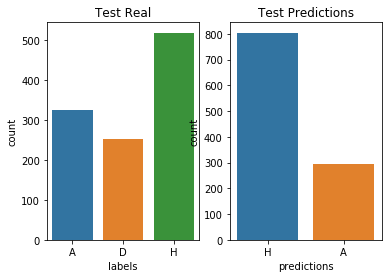

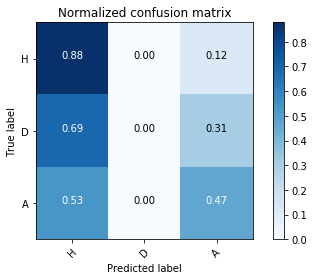


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.55
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_14_15.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.46

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


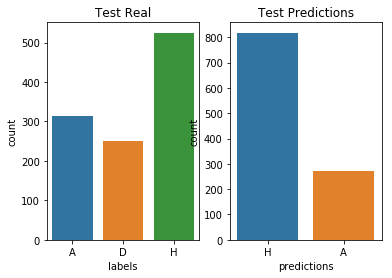

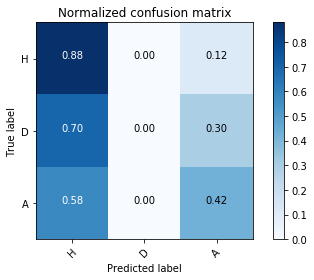


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.56
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_13_14.csv): 0.56

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.48

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


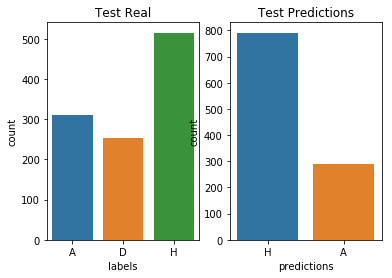

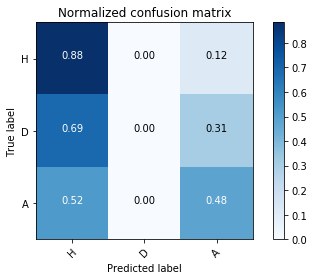


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.56
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_12_13.csv): 0.56

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


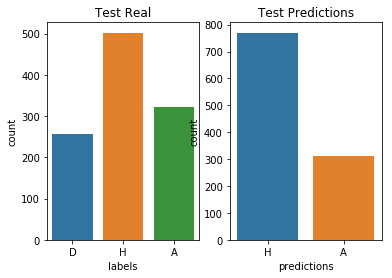

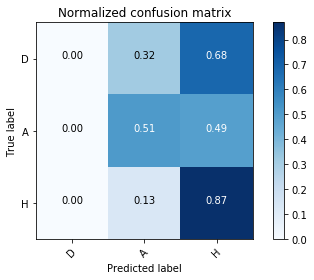


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.55
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_11_12.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


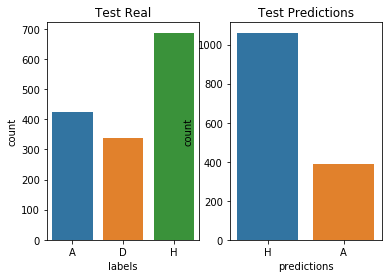

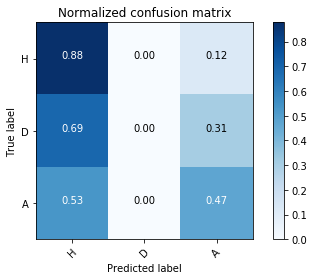


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.55
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_10_11.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


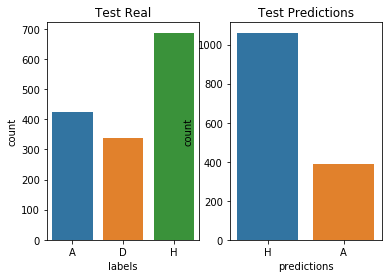

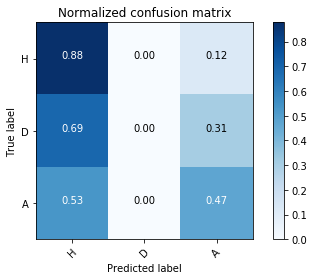


>>>  CLASSIFIER: odds

---------------------
*** ACCURACY ***
---------------------
Accuracy of odds classifier on training set: 0.55
Accuracy of odds classifier on test set (df_odds_onlinebookmakers_features_leagues_21518_seasons_09_10.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of odds classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


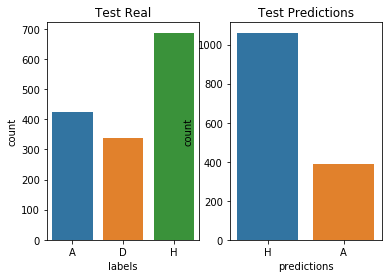

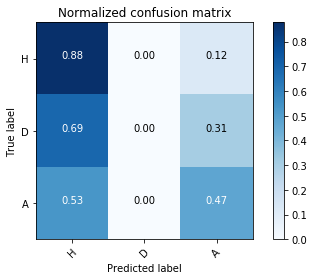

.......................
.......................

Avg Accuracy on training set: 0.5541842131096618
Avg Accuracy on testing set: 0.5541842131096618
Feature importance:
Normalized confusion matrix


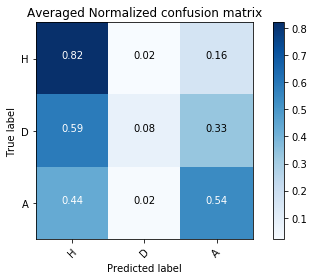

avg_train_acc  avg_test_acc  avg_f1_scores
0       0.554184      0.554184       0.471195

In [8]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']

leagues_id = [21518]
dataset = 'odds_onlinebookmakers_features'



import warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=Building_models_function_to_import.LowOddsModel(),classifier_name='odds', location_to_file = 'data/',onehot=[False], labelling= [False])
     

In [ ]:
result



In [ ]:
st = seasons[0].replace('/','_').replace('20','')
pddd = pd.read_csv('data/'+f'df_stanford_fifa_features_SMOTETomek_leagues_[{leagues_id[0]}]_seasons_[\'{st}\'].csv')
    

In [ ]:
pddd.shape


In [ ]:
st = seasons[0].replace('/','_').replace('20','')
pddd = pd.read_csv('data/'+f'df_stanford_fifa_features_AfterFE_leagues_[{leagues_id[0]}]_seasons_[\'{st}\'].csv')
pddd.shape    